# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

This problem is crucial to solve as major proportion of retail bank profits comes from home loans. These loans are mostly approved for regular income and high-earning clients. However, not all loans are repaid, therefore banks are most fearful of defaults, which are bad loans (NPA), that take a major portion of their profits. Approving loans is not easy, it's time consuming as the approval process takes into account their creditworthiness that has various variables. Looking into all the variables to approve a loan to the right customer can help mitigate many aspects important to the bank:
       
- Effective Financial Risk Management: Banks can make more effective and informed decisions on approving or denying home equity loans with accurate predictions on loan defaults. Mitigating this risk will prevent banks from losing a significant amount of money.
    
* Effective Resource Management/Utilization: Being able to identify potiential defaulters will allow the banks to prioritize their efforts on clients that are creditworth.
    
- Customer Services Quality: Being able to minimize loans to defaulters, the banks could be able to offer competitive loan products and interest rates. This would lead to better customer services and an increase in customer satisfaction.

* Fair Landing Practices: Seeing a client's background can be seen as bias when approving or denying loans. Therefore, developing an unbiased and data-driven loan approval process with data science and machine learning will help ensure that all potential loaners/clients are treated fairly and equaly. This approach aligns with the Equal Credit Opportunity Act guidelines and encourages responsible and ethical lending practices.
    
- Regulatory Compliance: There are many regulations that banks must follow to be insured when bad loans happen and they will cover potential losses. So, predicting defaulters will help the banks to comply with those regulations and avoid fines or operational restrictions.
    
* Competitive Advantages: Improving all the previous aspects by approving loans to only creditworthy clients will provide banks with a compitive edge on the marketplace. 

### **The objective:**

 - What is the intended goal?
The intended goal is to build a classification model to predict clients who are likely to default on their loans. This model will also give the banks recommendations on the important features to take into consideration while approving loan. 
Overall, the objective is to enhance the bank's loan approval process by using data science to make accurate and fair lending decisions.  

### **The key questions:**

- What are the key questions that need to be answered?
    - How can the bank leverage data science and machine learning to build an effective classification model for predicting loan defaults?
    - What features from the existing loan underwriting process should be considered as inputs to the model?
    - How can the model's performance be optimized in terms of accuracy, precision, and recall to ensure reliable predictions?
    - How can the model balance the trade-off between accuracy and interpretability to address the complexity of credit scoring in the context of home equity lines of credit?
    - In what ways can the model be made interpretable, providing justifications for loan rejections to meet regulatory requirements?
    - What recommendations can be derived from the model to assist the bank in making informed decisions during the loan approval process?
    - As economic conditions and borrower profiles change over time, how can the model be regularly updated and maintained to ensure its pertinence and accuracy in predicting loan defaulters?
    - How can the model adhere to the guidelines of the Equal Credit Opportunity Act to ensure fairness and prevent biases?
     

### **The problem formulation**:

- What is it that we are trying to solve using data science?
Using data science, we are trying to solve home equity loan accuracy. The classification model, using historical data on loan applicants, will predict which clients are more likely to default on their loans. This model will help the bank make informed decisions about whether to approve or reject loan applications by analazing various features. It will help minimize financial risks, therefore improving the bank's profitability and responsible lending practices.
The ultimate aim of this prediction is to use data science and machine learning to enhance the efficiency and fairness of the loan approval process all the while minimizing the risk of defaults.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

#### Importing the necessary libraries

In [1]:
# Import libraries for Data reading & manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Import libraries to split data
from sklearn.model_selection import train_test_split


# Import libraries to build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics


# Import libraries to tune different models
from sklearn.model_selection import GridSearchCV

# Import libraries to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Import libraries to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Setting display options
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

#### Importing the necessary dataset

In [2]:
# Read the data and naming it "hmeq" (original)
hmeq=pd.read_csv("hmeq.csv")

In [3]:
# Creating a copy data to work on to avoid any changes to the original data ("hmeq")
data = hmeq.copy()

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [4]:
# returns the first 5 rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  CLAGE  \
0    1  1100 25860.00  39025.00  HomeImp   Other 10.50   0.00    0.00  94.37   
1    1  1300 70053.00  68400.00  HomeImp   Other  7.00   0.00    2.00 121.83   
2    1  1500 13500.00  16700.00  HomeImp   Other  4.00   0.00    0.00 149.47   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN    NaN   
4    0  1700 97800.00 112000.00  HomeImp  Office  3.00   0.00    0.00  93.33   

   NINQ  CLNO  DEBTINC  
0  1.00  9.00      NaN  
1  0.00 14.00      NaN  
2  1.00 10.00      NaN  
3   NaN   NaN      NaN  
4  0.00 14.00      NaN

In [5]:
# return the last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900 57264.00 90185.00  DebtCon  Other 16.00   0.00    0.00   
5956    0  89000 54576.00 92937.00  DebtCon  Other 16.00   0.00    0.00   
5957    0  89200 54045.00 92924.00  DebtCon  Other 15.00   0.00    0.00   
5958    0  89800 50370.00 91861.00  DebtCon  Other 14.00   0.00    0.00   
5959    0  89900 48811.00 88934.00  DebtCon  Other 15.00   0.00    0.00   

      CLAGE  NINQ  CLNO  DEBTINC  
5955 221.81  0.00 16.00    36.11  
5956 208.69  0.00 15.00    35.86  
5957 212.28  0.00 15.00    35.56  
5958 213.89  0.00 16.00    34.34  
5959 219.60  0.00 16.00    34.57

#### Observations:

* The DataFrame has 13 columns as mentioned in the Data Dictionary. Data in each row corresponds to the different information about the client.

In [6]:
# Checking the shape of the data
data.shape

(5960, 13)

#### Observations:

* In our data, Home Equity dataset (hmeq), there are 5960 rows and 13 columns.

In [7]:
# Checking the data types of each columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


#### Observations:

* There are 5960 observations and 13 columns in the dataset.

- There are 11 numerical columns. 
    - 2 are interger type (BAD, a binary variable, and LOAN)
    - 9 is a float type (MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC)

* There are 2 object columns 
    * REASON and JOB
    
- Only the first two columns (BAD and LOAN) have all 5960 observations. All the other columns are missing some values. Let's check how many observations those columns are missing.

In [8]:
# Analyzing the missing values:
    # table with number of missing values and the percentage
    # ratio of missing values in the data set

# Calculate the total number of missing values in each column
missing_count = data.isnull().sum()

# Calculate the total number of rows in the dataset
total_rows = data.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_count / total_rows) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Sort the columns by missing percentage (descending order)
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the missing information
print(missing_info)

print("-" * 50)

# Ratio of missing values in the dataset
total_values = data.shape[0]*data.shape[1]
ratio = data.isnull().values.sum()/total_values *100
print('Ratio of missing values', round(ratio, 2))

         Missing Count  Missing Percentage
DEBTINC           1267               21.26
DEROG              708               11.88
DELINQ             580                9.73
MORTDUE            518                8.69
YOJ                515                8.64
NINQ               510                8.56
CLAGE              308                5.17
JOB                279                4.68
REASON             252                4.23
CLNO               222                3.72
VALUE              112                1.88
BAD                  0                0.00
LOAN                 0                0.00
--------------------------------------------------
Ratio of missing values 6.8


**Observations:**
* There are missing values in 11 columns out of 13. 
* The missing values of each columns varies.
    * 'DEBTINC' is the column with the most missing values, 1267 missing values representing 21.26%, which is relatively high. This may have an impact on the analysis.
    * 'DEROG' is the following variable with a high missing percentage equal to 11.88%, which represent 708 missing values.
    * Columns of noticible missing percentage (8.56% - 9.73%) are DELINQ, MORTDUE, JOY, and NINQ).
    * Columns with lower missing percentage (1.88% - 5.17%) are CLAGE, JOB, REASON, CLNO, and VALUE.
* Overall, the missing value ratio in the dataset is 6.8% which is considered moderate but still small. We can use imputation techniques to handle the missing values

- The total number of missing values and the percentage of missing values are both relevant as:
    - the missing count gives an idea of the absolute quantity of missing data.
    - the missing percentage provides a relative measure, allowing the comparasion of missingness across different columns to be easier.
- Therefore, combining both metrics can help evaluate the impact of missing data on specific columns more comprehensively.

* In this context, loan prediction, the limit of percentage of missing values in a column depends on the specific feature and their importance. However, as a general guideline, columns exceeding 5-10% of missing values should require careful consideration.
* There are different challenges associated with filling missing values or avoiding them:
    * bias in prediction
    * model imterpretability
    * risk assessment
    * data privacy and compliance
    * model performance

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

#### Observations:
* There are no duplicate value seen in this data.

**Converting the object type columns to categories** as it is beneficial for memory efficiency and performance improvement.

In [10]:
# Converting the object type columns (REASON and JOB) to categories in a list called "cat_col"
cat_col = data.select_dtypes(['object']).columns.tolist()

# Adding the target variable "BAD" to the categorical list as this is a classification problem and the target variable is categorical
cat_col.append('BAD')

# Printing the categorical list "cat_col"
cat_col

['REASON', 'JOB', 'BAD']

In [11]:
# Changing the data type of object type column to category
for i in cat_col:
    data[i] = data[i].astype('category')

In [12]:
# Check data info again to ensure BAD and the 'object' type columns were converted to categories
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


**Observations:**

* The "object" type columns and "BAD" variable have indeed been converted to "category" type columns.

## Summary Statistics

### Checking the statistical summary for Numerical variables

In [13]:
# Checking the statistical summary for Numerical variables
data.describe().T

count      mean      std     min      25%      50%       75%  \
LOAN    5960.00  18607.97 11207.48 1100.00 11100.00 16300.00  23300.00   
MORTDUE 5442.00  73760.82 44457.61 2063.00 46276.00 65019.00  91488.00   
VALUE   5848.00 101776.05 57385.78 8000.00 66075.50 89235.50 119824.25   
YOJ     5445.00      8.92     7.57    0.00     3.00     7.00     13.00   
DEROG   5252.00      0.25     0.85    0.00     0.00     0.00      0.00   
DELINQ  5380.00      0.45     1.13    0.00     0.00     0.00      0.00   
CLAGE   5652.00    179.77    85.81    0.00   115.12   173.47    231.56   
NINQ    5450.00      1.19     1.73    0.00     0.00     1.00      2.00   
CLNO    5738.00     21.30    10.14    0.00    15.00    20.00     26.00   
DEBTINC 4693.00     33.78     8.60    0.52    29.14    34.82     39.00   

              max  
LOAN     89900.00  
MORTDUE 399550.00  
VALUE   855909.00  
YOJ         41.00  
DEROG       10.00  
DELINQ      15.00  
CLAGE     1168.23  
NINQ        17.00  
CLNO        71.00  
DEBTINC    203.31

**Observations for Numerical variables:**

* LOAN (Amount of loan approved): 
    * The loan ranges from 1,100 to 89,900 dollars, which varies significally.
    * The average loan is around 18,608 dollars with a standard deviation of ~11,207 dollars.
    * 50% of the loans are between 11,100 and 23,300 dollars. 
    * However, 50% of the clients have a loan of at least 16,300 dollars (median).


- MORTDUE (Amount due on the existing mortgage):
    - The amount due on the exisiting mortgage varies extensively as it ranges from 2,063 to 399,550 dollars.
    - The average is ~73,761 dollars with a standard deviation of ~44,458 dollards.
    - 50% of the amount due on the existing mortgages are between 46,276 and 91,488 dollars with a median at 65,276 dollars.


* VALUE (Current value of the property): 
    * The current value of the property ranges from 8,000 to 855,909 dollars, which is also varies significally.
    * The average value is ~101,776 dollars with a standard deviation of ~57,386 dollars.
    * 50% of the values are between ~66,075 and 119,825 dollars with the median at ~89,235 dollars.


- LOAN, MORTDUE, and VALUE variables:
    - they varies extensively, indicating a large diversity in client's loan applications.
    - The means of the variables are higher than the medians, indicating right skewness in the data.


* YOJ (Years at present job):
    * The average years at current job is ~9 years with a maximum of 41 years.
    * 50% of the clients have spent between 3 and 13 years at their current job with a median at 7 years.


- DEROG (Number of major derogatory reports):
    - The maximum of major derogatory reports is 10.
    - However at least 75% of the clients have not recieved any major derogatory reports.
    - As this variable as sparse values, it will be analyze with the categorical variables during the univarite analysis.
   
   
* DELINQ (Number of Delinquent Credit Lines):
    * The maximum of delinquent credit lines is 15.
    * However at least 75% of the clients do not have any delinquent credit lines.
    * As this variable as sparse values, it will be analyze with the categorical variables during the univarite analysis.
    
    
- CLAGE (Age of Oldest Credit Line in Months): 
    - The age of the oldest credit line varies from 0 to 1,168.23 months, which around 97 years.
    - The average CLAGE is ~179.77 months or almost 15 years.
    - 50% of the CLAGE are between 115 and 232 months (~9.5 - ~19 years) with a median at ~173.47 months (12years).


* NINQ (Number of recent credit inquiries):
    * The maximum number of recent credit inquiries is 17.
    * At least 50% of the clients have 1 recent credit inquiry.
    * And less than 75% have 2 recent credit inquiry.
    * As this variable as sparse values, it will be analyze with the categorical variables during the univarite analysis.


- CLNO (Number of existing credit lines):
    - The number of existing credit lines varies from 0 to 71.
    - The average CLNO is ~21 which is very close to the median with 20 CLNO.
    - 50% of the clients have between 15 and 16 CLNO.


* DEBTINC (Debt-to-income ratio):
    * The debt-to-income ratio ranges from ~0.52 to ~203.31.
    * The average debt-to-income ratio is 33.78 which is also very similiar to the median with 34.82.
    * 50% of the clients have a debt-to-income ratio between 29.14 and 39.

### Checking the statistical summary for Categorical variables

In [14]:
# Checking the statistical summary for Categorical variables
data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Observations:**

* BAD:
    * It's a binary categorical variable with two unique values: 0 and 1.
    * The most frequent value (top) is 0, indicating that 4771 clients out of 5960 have repaid their loans, which represent ~80%.


- REASON (Reason for the loan request):
    - It's also a binary categorical variable with two unique values.
    - The most frequent reason is DebtCon (Debt Consolidation), indicating that 3928 clients out of 5708 have taken new loan to pay off other liabilities and consumer debts, which represent ~68.82%.


* JOB:
    * There are 6 unique jobs categories.
    * The most frequent job category is "Other" that is listed for 2388 clients out of the 5681 that have a job category entry.  

**Checking what are the Categorical variables unique values**

In [15]:
# Checking the count of unique values in each categorical column

# Creating a new dataset "col_cat_unique" only with the categorial variables 
cat_col_unique= data.select_dtypes(['category'])

for i in cat_col_unique.columns:
    print('Unique values in',i, 'are :')
    print(data[i].unique())
    print('*'*40)

Unique values in BAD are :
[1, 0]
Categories (2, int64): [0, 1]
****************************************
Unique values in REASON are :
['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
****************************************
Unique values in JOB are :
['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
****************************************


**Observations:**
* The BAD variable is binary categorical variable with two unique values: 0 and 1.
* The REASON variable has 2 categories: 'DebtCon', 'HomeImp'. But it also has some missing values indicated by NaN in the dataset. 
* The Job variable has 6 categories: 'Mgr', 'Office', 'Other', 'ProfExe', 'Sales', and 'Self'. But it also has some missing values indicated by NaN in the dataset.

- The results do not give the aboslute count of the unique values in each categorical columns. However, the absolute values are not always a good measure especially if the total counts in different categorical columns vary significally and it might not be as informative. 

Considering  relative frequencies could be more informative to compare the distribution across categories.

In [16]:
# Printing the relative frequencies
for i in cat_col_unique.columns:
    print('The relative frequencies in',i, 'are :')
    print(data[i].value_counts(normalize=True)*100)
    print('*'*40)

The relative frequencies in BAD are :
BAD
0   80.05
1   19.95
Name: proportion, dtype: float64
****************************************
The relative frequencies in REASON are :
REASON
DebtCon   68.82
HomeImp   31.18
Name: proportion, dtype: float64
****************************************
The relative frequencies in JOB are :
JOB
Other     42.03
ProfExe   22.46
Office    16.69
Mgr       13.50
Self       3.40
Sales      1.92
Name: proportion, dtype: float64
****************************************


**Observations:**
* In the "BAD" column, the observations are imbalanced with a higher proportion of loan repaid (0) with 80.05%. This is a good observation as it means that 80% of the clients have repaid their loans.
* In the "REASON" column, 68.82% of the clients have required a new loan for Debt Consolidation (DebtCon).
* 46.71% of the clients do not have their current occupation in one of the job categories offered by the application (42.03% in catogory "Other" and 4.68% are missing values).
* The Sales categories in JOB is the least frequent category chosen with 1.92% of the clients.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


#### Numerical variables (without DEROG, DELINQ, and NINQ)

In [17]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,         # Number of rows of the subplot grid= 2
        sharex=True,     # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    ) # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    ) # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label='Mean'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label='Median'
    )  # Add median to the histogram
    ax_hist2.legend()  # add the mean and median legend to the plots

##### A. Loan (Amount of loan approved)

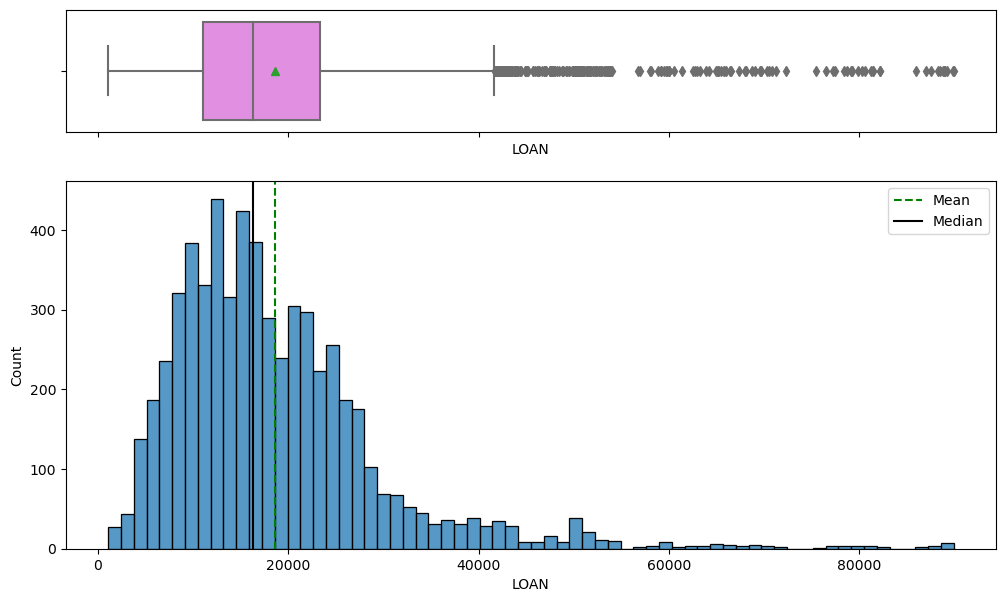

In [18]:
histogram_boxplot(data, 'LOAN')

**Observations:**
* The amount of the loan approved varies around 1,000 to around 89,000 dollars.
* The amount of the loan approved are concentrated in the lower range (<30,000 dollars).
* There are many outliers for some significally higher amounts.
* The distribution of this variable is positively skewed.

##### B. MORTDUE (Amount due on the existing mortgage)

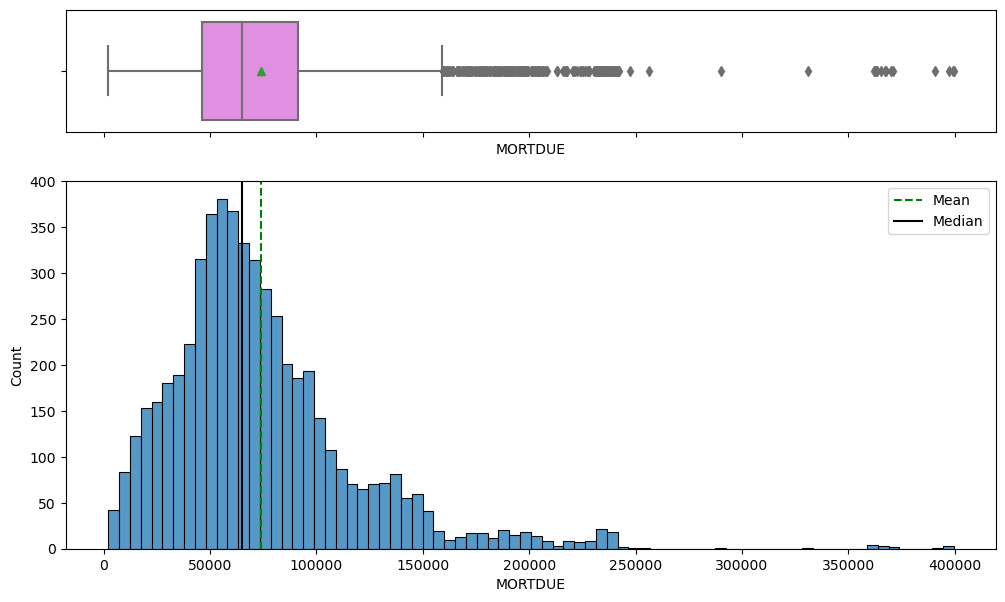

In [19]:
histogram_boxplot(data, 'MORTDUE')

**Observations:**
* The amount due on existing mortgages varies from ~2,000 to ~400,000 dollars.
* The MORTDUE is concentrated between ~40,000 and ~80,000 dollars.
* There are many outliers for some significally higher amounts due on their current mortgage.
* The distribution is positively skewed.

##### C. VALUE (Current value of the property)

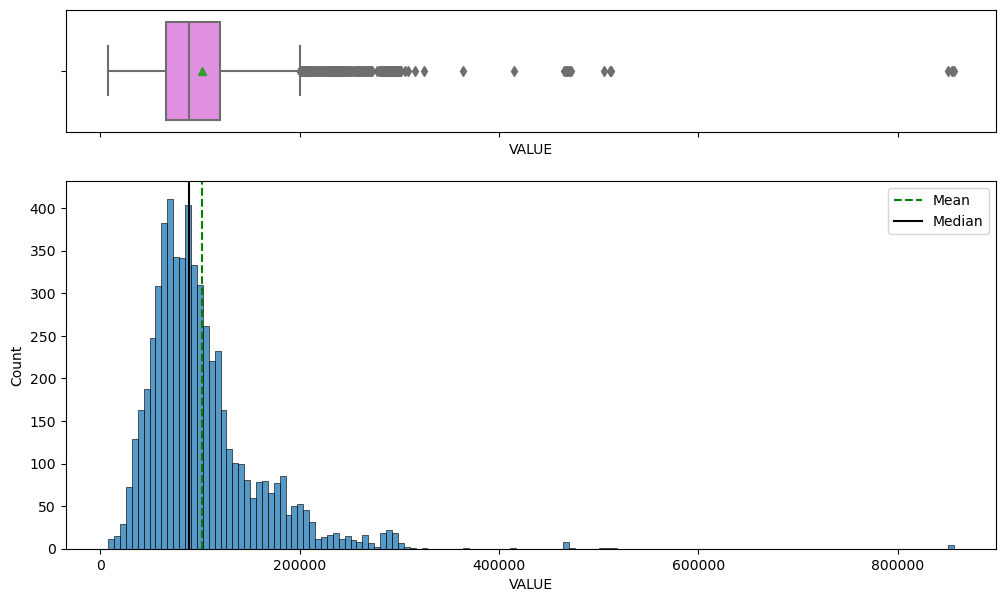

In [20]:
histogram_boxplot(data, 'VALUE')

**Observations:**
* The current value of the proprety ranges from ~8,000 to 850,000 dollars.
* The VALUE is concentrated between ~5,000 and ~110,000 dollars.
* There are also many outliers, most are between 200,000 and ~350,000 dollars, some between ~350,000 and ~500,000 dollars, and a couple around 850,000 dollars.
* The distribution is positively skewed.

##### D. YOJ (Years at present job)

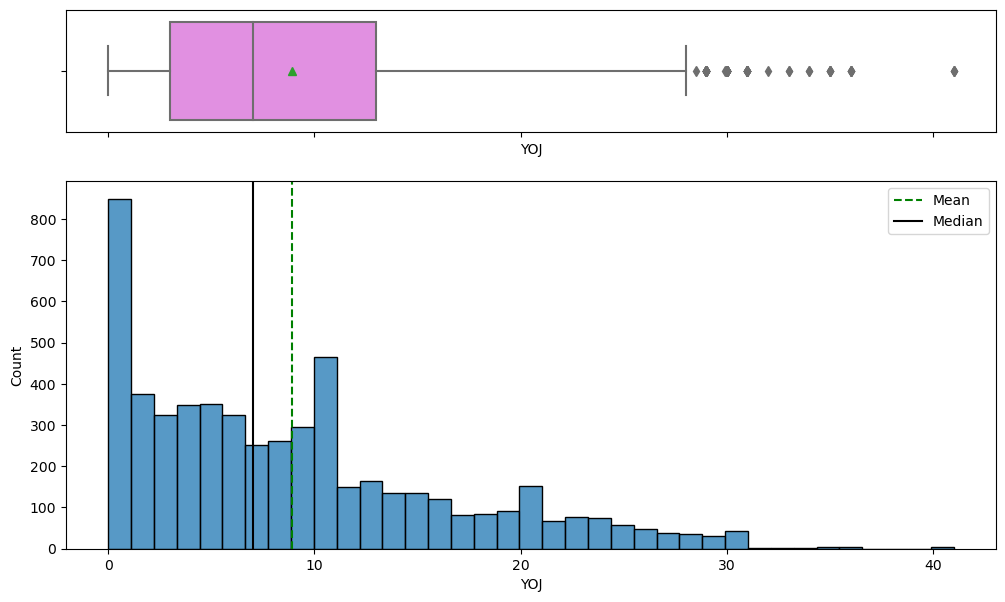

In [21]:
histogram_boxplot(data, 'YOJ')

**Observations:**
* Years at present job varies between 0 and ~41 years
* Around 900 clients have been at their current job less than 1 year.
* 50% of the clients have been at their currrent job between 3 and 13 years.
* There are some outliers showing that some clients have spent at least 28 years at their current job.
* The distribution is positively skewed.

##### E. CLAGE (Age of the oldest credit line in months)

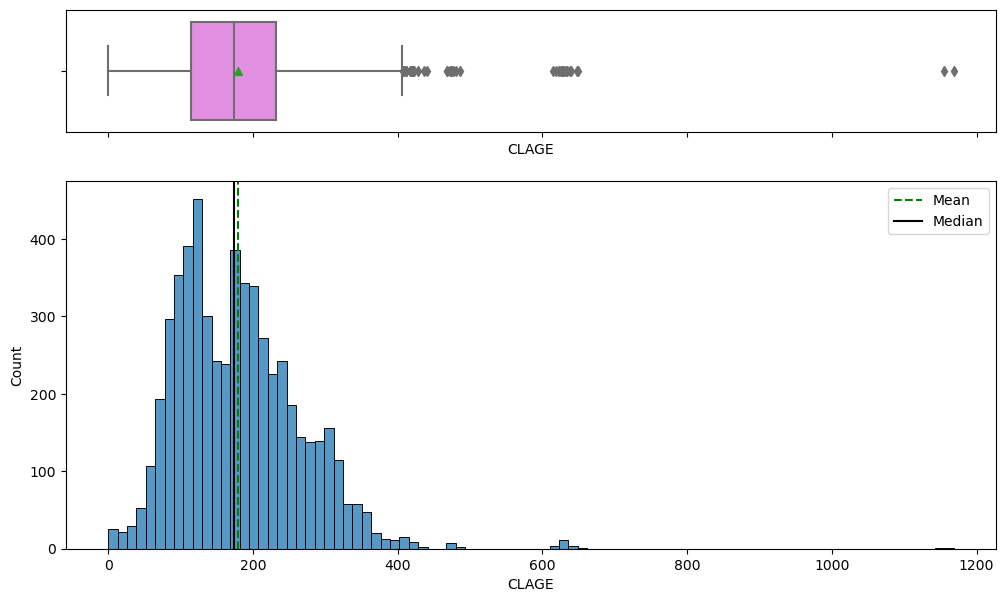

In [22]:
histogram_boxplot(data, 'CLAGE')

**Observations:**
* The Age of the oldest credit line ranges from 0 to ~1150 months (0 to ~96 years).
    * Could the two ouliers around 1150 months data entry errors? Since if the CLAGE of the client is ~96 years and if their 1st line of credit started at when the client was 18 that means they are 114 when they applied for a loan. 
* 50% of the CLAGE are between ~100 and ~250 months.
* There are also many outliers, most are between 400 and ~500 months, some between ~600 and ~650, and a few around ~1150 months.
* The distribution is slightly positively skewed.

##### F. CLNO (Number of existing credit lines)

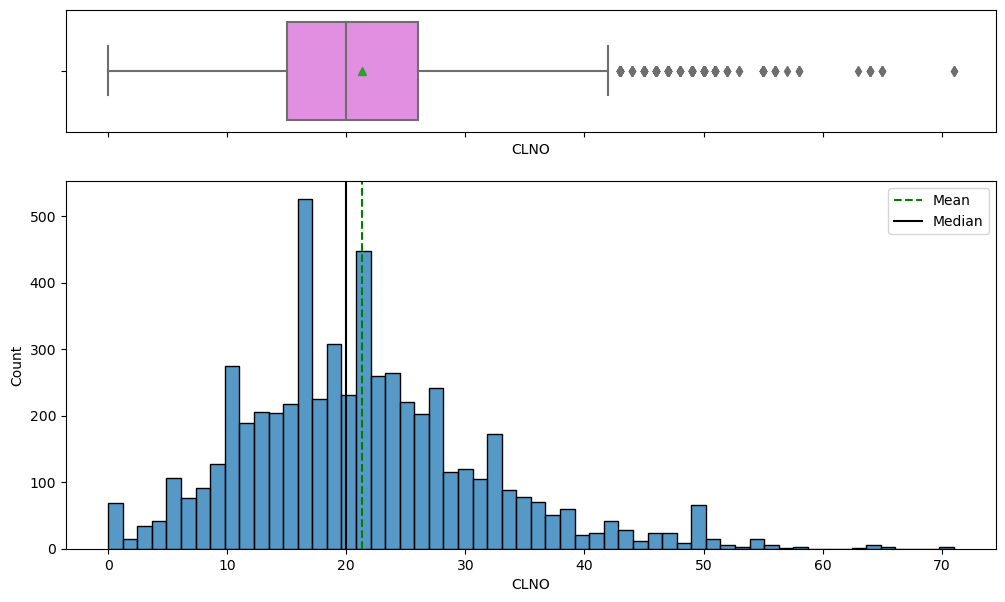

In [23]:
histogram_boxplot(data, 'CLNO')

**Observations:**
* The number of existing credit lines ranges from 0 to ~71.
* 50% of the clients have between 15 and ~26 existing credit lines.
* The median is slighty under 20 CLNO. 
* There are some outliers.
* The similarity between the mean and the median suggests that the distribution is relatively symmetric.

##### G. DEBTINC (Debt-to-income ratio)

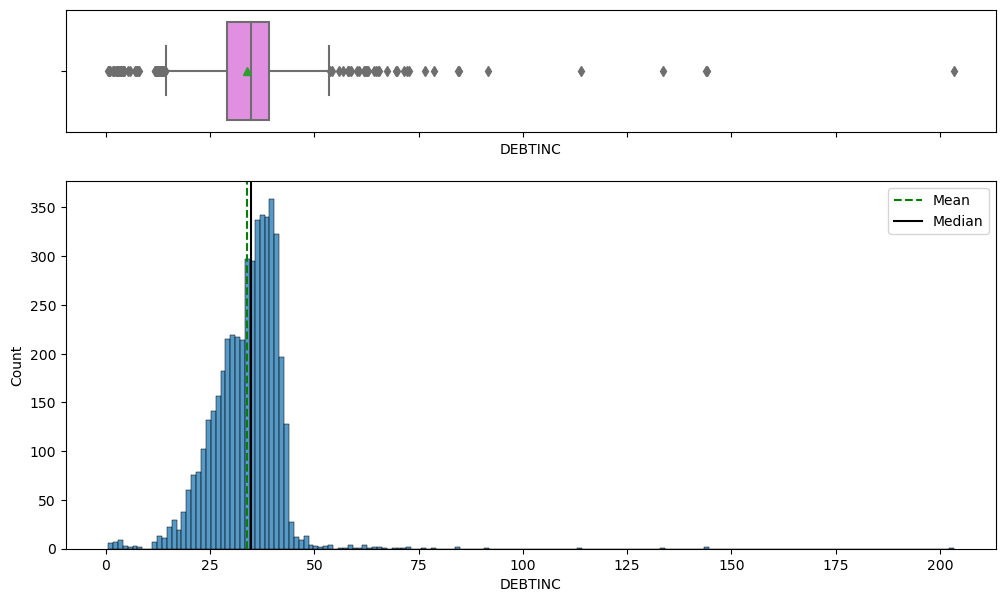

In [24]:
histogram_boxplot(data, 'DEBTINC')

**Observations:**
* Debt-to-income ratio ranges from ~0 to ~200.
* 50% of the clients have a debt-to-income ratio between ~30 and ~40.
* The mean and median are similiar ~34, show that majority of the clients have moderate debt-to-income ratio.
* There are some outliers on both sides of the box plot.
    * Some clients have relatively low debt-to-income ratio
    * Some clients have higher debt-to-income ratio.
    * A couple of clients have exceptionally high ratios (>100), which could potentially pose a risk.
* The distibution is slightly negatively skewed.

#### Categorical columns (with DEROG, NINQ, and DELINQ)  

In [25]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=60, fontsize=9)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### A. DEROG (Number of major derogatory reports)

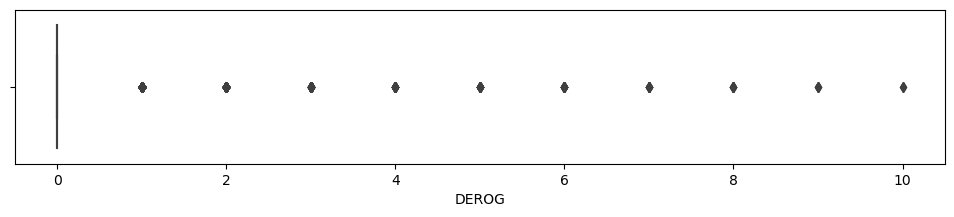

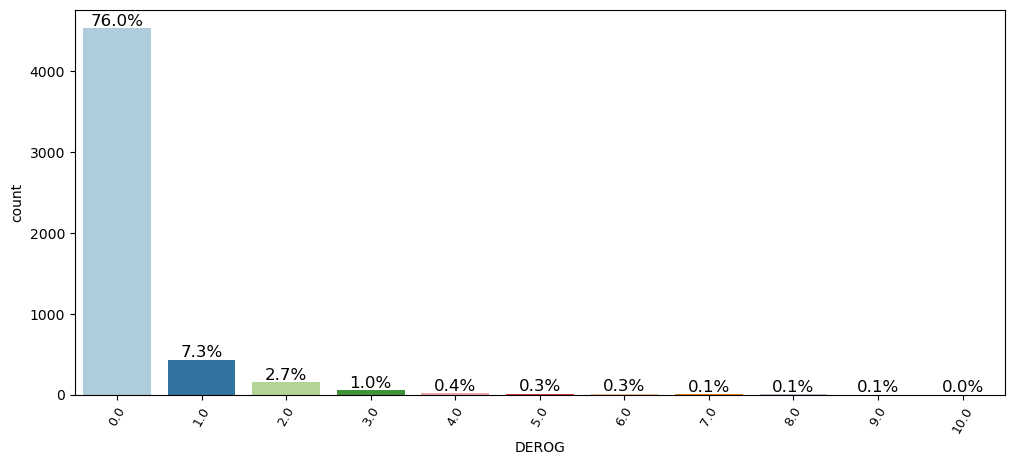

In [26]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=data, x='DEROG')
labeled_barplot(data, 'DEROG')

**Observations:**
* There are no visible boxplot as 76% of the clients (~4500) have no major derogatory reports.
* There are some outliers showing exctreme values in the dataset.
* 7.3% of the clients have 1 major derogatory report.
* 2.7% of the clients have 2 major derogatory reports.
* On the labeled barplot, the outlier indicating 10 major derogatory reports shows 0% of clients had this number, however, the boxplot does shows this data point. So, a very small number of clients, proprably just 1, had the maximum DEROG.
* The clustering around 0 forms a tight distribution.

##### B. DELINQ (Number of delinquent credit lines)

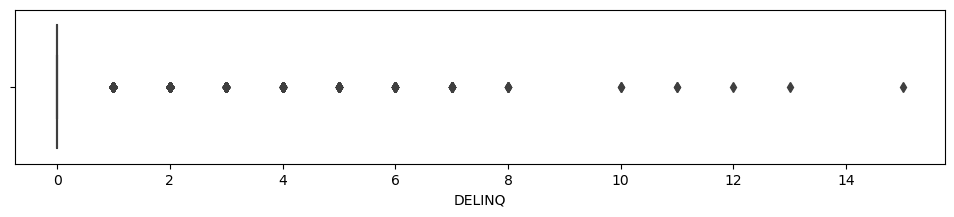

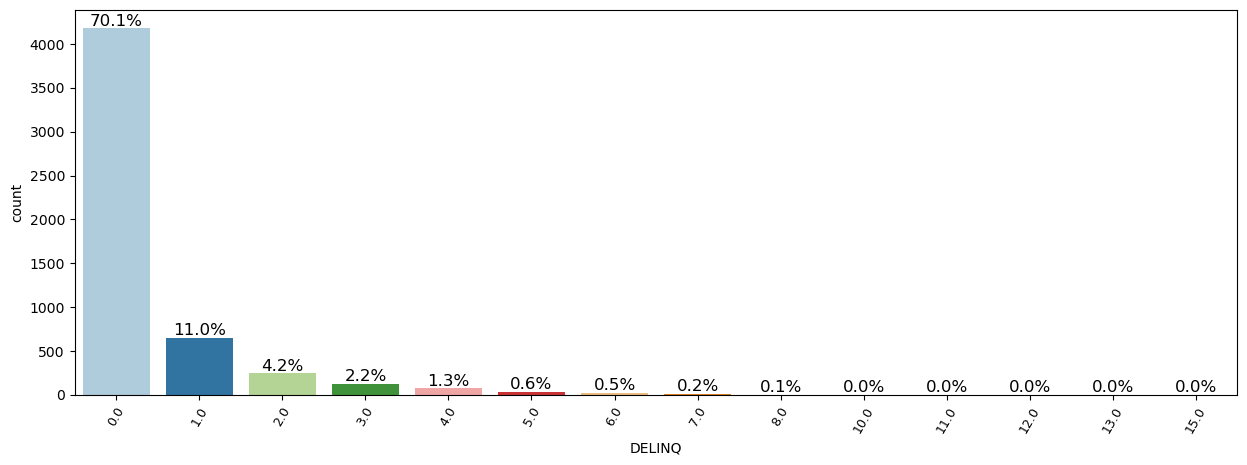

In [27]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=data, x='DELINQ')
labeled_barplot(data, 'DELINQ')

**Observations:**
* There are no visible boxplot as 70.1% of the clients (~4200) have no delinquent credit lines.
* There are some outliers showing exctreme values in the dataset.
* 11% of the clients have 1 delinquent credit line.
* 4.2% of the clients have 2 delinquent credit lines.
* On the labeled barplot, the outliers indicating 10, 11, 12, and 15 delinquent credit lines show 0% of clients have those number, however, the boxplot does shows this data point. So, a very small number of clients, proprably just 1, had the maximum DELINQ.
* The clustering around 0 forms a tight distribution.

##### C. NINQ (Number of recent credit inquiries)

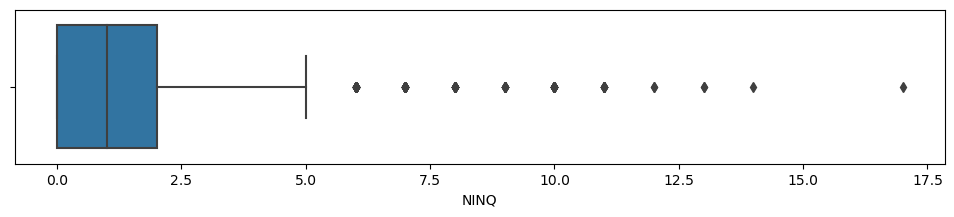

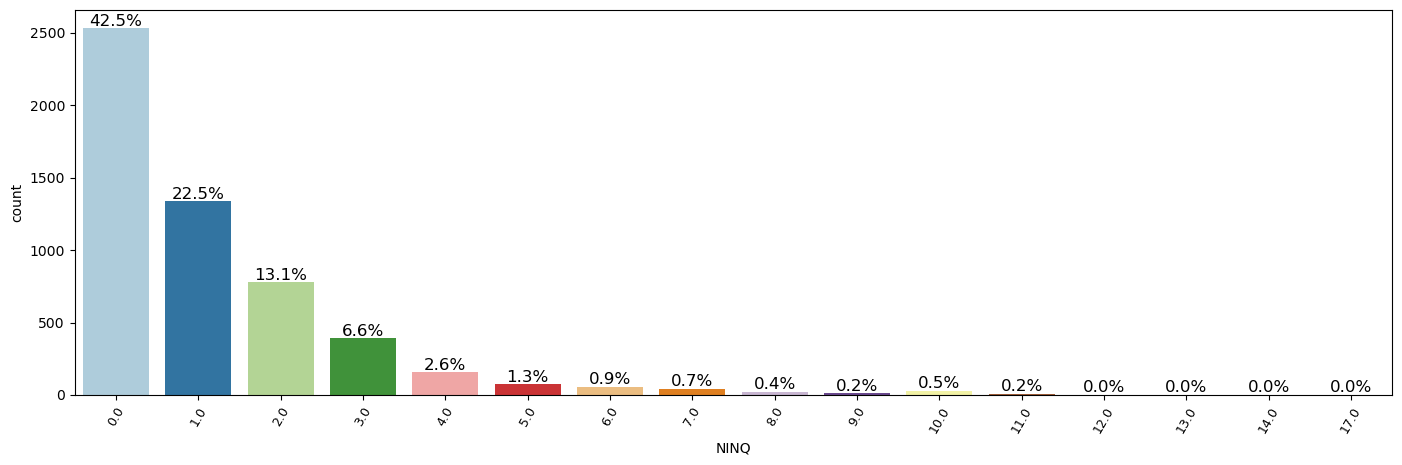

In [28]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=data, x='NINQ')
labeled_barplot(data, 'NINQ')

**Observations:**
* The number of recent credit inquiries ranges between 0 and 17.
* 75% of the NINQ are under 2.
* The 42.5% of the clients (~2500) do no have any recent credit inquiries.
* There are some outliers indicating that some clients have inquired more than 6 recent credit.
* On the labeled barplot, the outliers indicating 13, 14, and 17 recent credit inquiries show 0% of clients have those number, however, the boxplot does shows this data point. So, a very small number of clients, proprably just 1, had the maximum NINQ.
* The distribution is positively skewed.

##### D. BAD (1 = Client defaulted on loan, 0 = loan repaid)

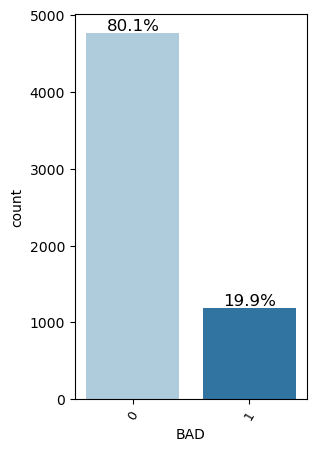

In [29]:
labeled_barplot(data, 'BAD')

**Observations:**
* There is an imbalance in the dataset.
* 80.1% of the clients (4771 out of 5960, seen during the  statistical summary) have repaid their loan.
* 19.9% of the clients (1189) are deflauters as they have not repaid their loans.

##### E. REASON (Reason for the loan request)

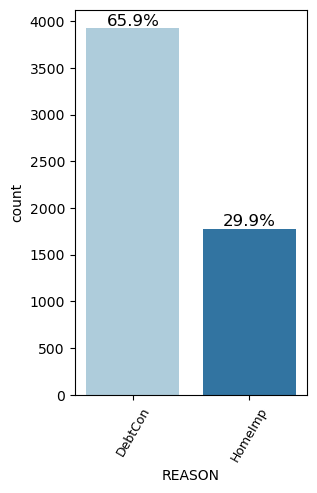

In [30]:
labeled_barplot(data, 'REASON')

**Observations:**
* Reminder this variable has some missing values. Only 5708 out of 5960 (95.8%) reasons have been specified, seen during the statistical summary.
* DebtCon (Debt Consolidation) is the most common reason, as 65.9% of the clients (3928 out of 5708) chose this category.
* 29.9% of the clients (1780) have applied for a home improvement loan.

##### F. JOB (The type of job)

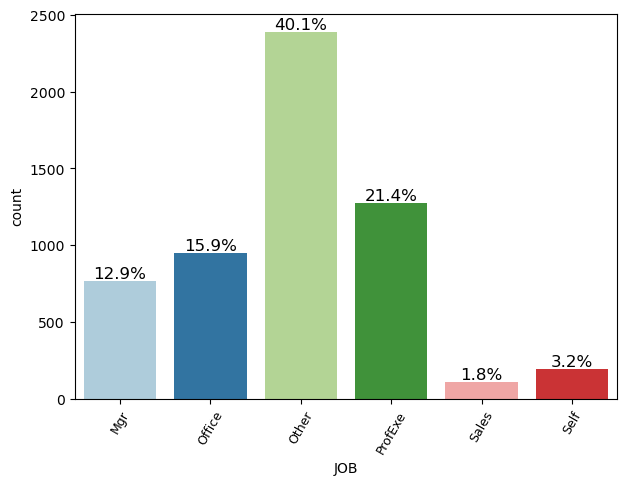

In [31]:
labeled_barplot(data, 'JOB')

**Observations:**
* Reminder this variable has some missing values. Only 5681 out of 5960 (95.3%) jobs have been specified, seen during the statistical summary.
* 40.1% of the clients (2388) have entered "Other" as their job in their application.
* 21.4% of the clients (~1216) hold professional or executive positions.
* 3.2% of the clients (~182) are self-employed.
* 1.8% of the clients (~102) works in sales.

### **Bivariate Analysis: Numerical and Categorical Variables**

In [32]:
# Relationship between the BAD and Loan
def boxplots(data, target, predictor):

    plt.figure(figsize=(13, 6))

    plt.subplot(1,2,1)
    sns.boxplot(data=data, x=target, y=predictor)
    plt.title(f'{target} vs {predictor} Relationship')
    plt.xlabel(target, size=13)
    plt.ylabel(predictor, size=13)
    plt.xticks(fontsize=11)

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=target, y=predictor, sym='')
    plt.title(f'{target} vs {predictor} Relationship (without outliers)')
    plt.xlabel(target, size=13)
    plt.ylabel(predictor, size=13)
    plt.xticks(fontsize=11)

    plt.show()

##### A. BAD vs Loan (Amount of money approved in dollars)

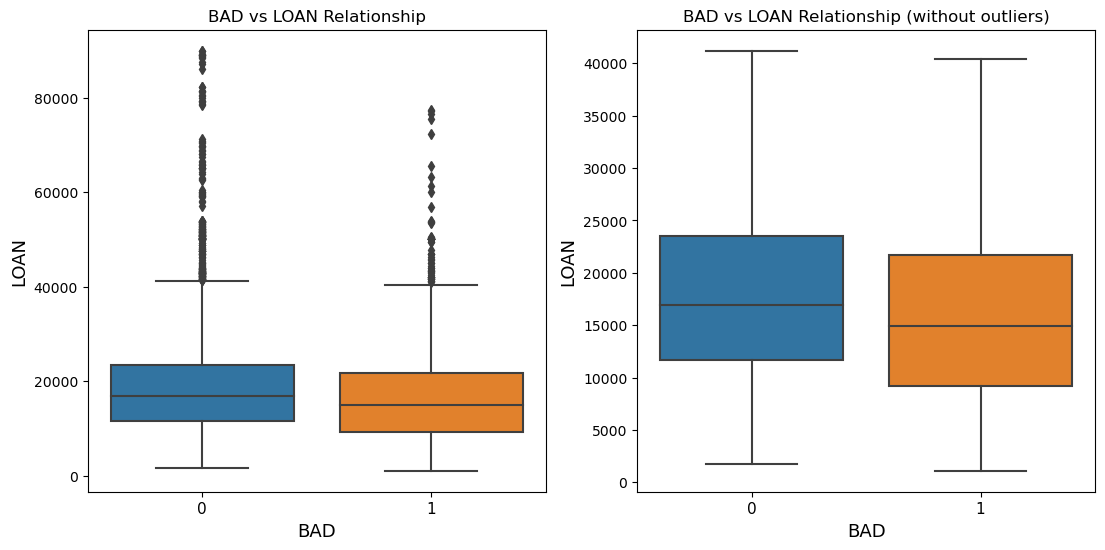

In [33]:
# Relationship between the BAD and Loan
boxplots(data, 'BAD', 'LOAN')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in the loads.
* The median of client's loans who defaulted is lower than the repaid loans.  
* Therefore, on average, the loans of clients who have defaulted is not higher than the ones who have repaid their loans.

##### B. BAD vs MORTDUE (Amount due on the existing mortgage)

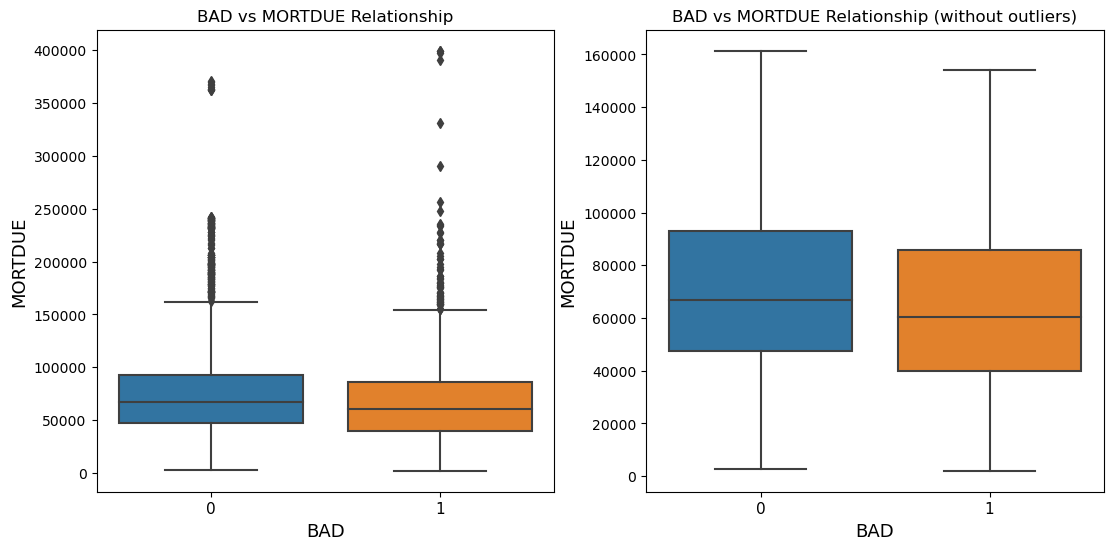

In [34]:
# Relationship between the BAD and MORTDUE
boxplots(data, 'BAD', 'MORTDUE')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in the amount due on existing mortgages.
* The median of client's MORTDUE who defaulted is lower than the repaid loans.  
* Therefore, on average, the MORTDUE of clients who have defaulted is not higher than the ones who have repaid their loans.

##### C. BAD vs VALUE (Current value of the property)

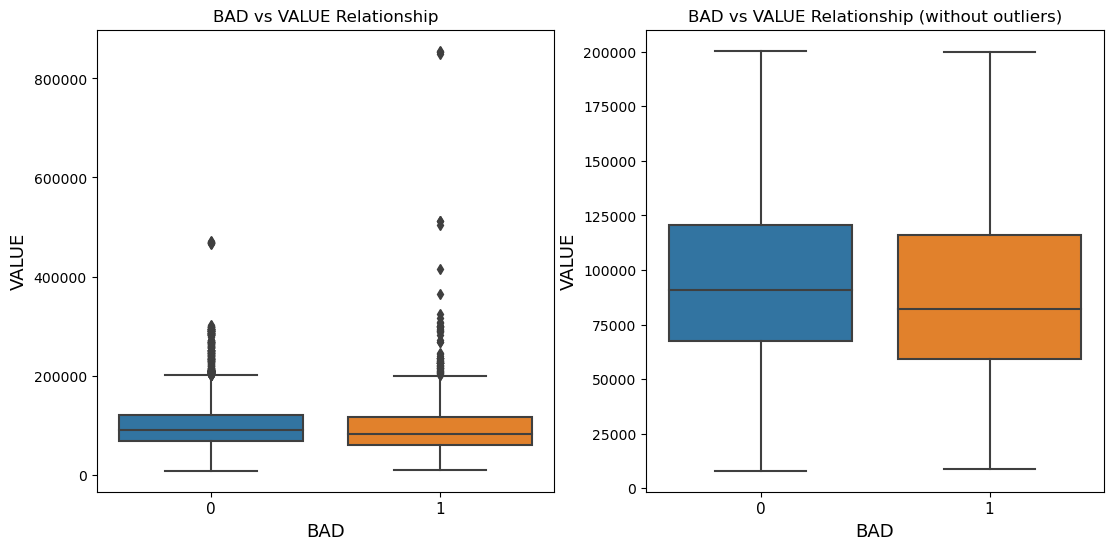

In [35]:
# Relationship between the BAD and VALUE
boxplots(data, 'BAD', 'VALUE')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in the current value of the property. However, in the defaulters clients, there are a couple of extreme values higher than 800,000 dollars. 
* The median of client's VALUE who defaulted is lower than the repaid loans.  
* Therefore, on average, the VALUE of clients who have defaulted is not higher than the ones who have repaid their loans.

##### D. BAD vs YOJ (Years at present job)

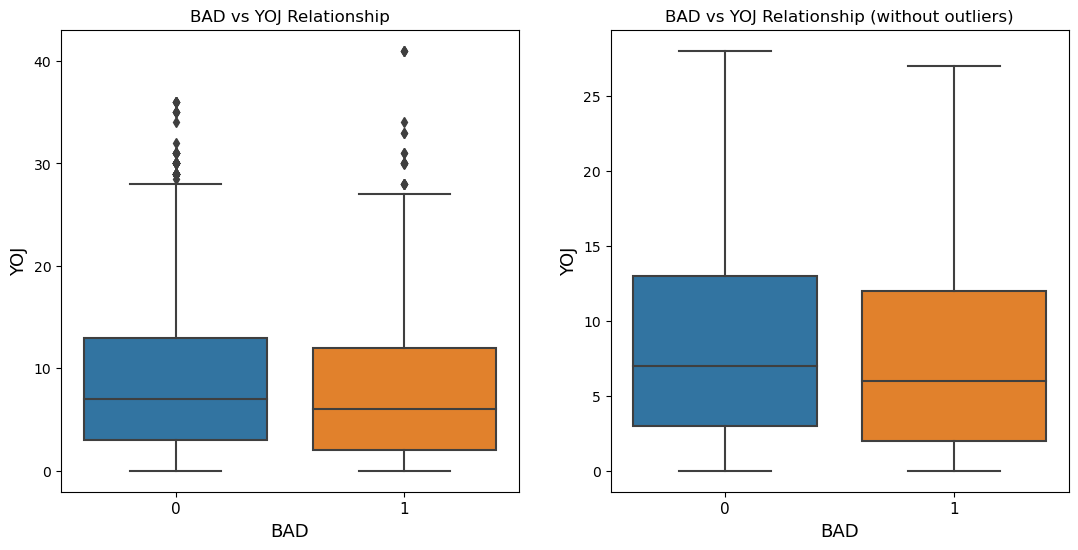

In [36]:
# Relationship between the BAD and YOJ
boxplots(data, 'BAD', 'YOJ')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in the years at present job. However, in the defaulters clients, there is 1 outlier at 41 years. 
* The median of client's YOJ who defaulted is lower than the repaid loans.  
* Therefore, on average, clients who have defaulted is not higher than the ones who have repaid their loans.

##### E. BAD vs DEROG (Number of major derogatory reports)

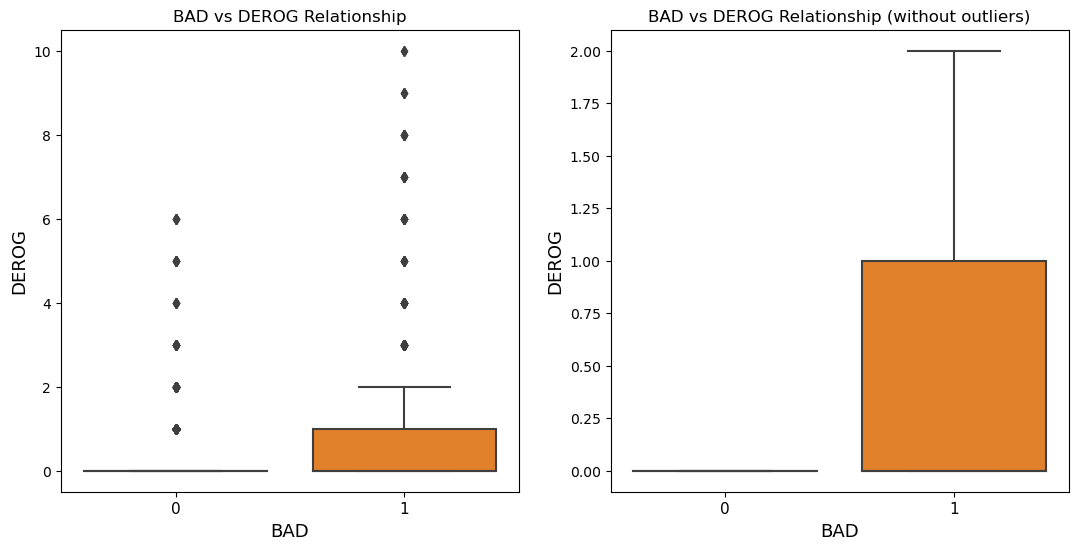

In [37]:
# Relationship between the BAD and DEROG
boxplots(data, 'BAD', 'DEROG')

**Observations:**
* Defaulters clients have higher numbers of major derogatory reports.
* 75% of the defaulters clients (~892 out of 1189) have 0 or 1 DEROG, whereas almost 100% of the clients who have repaid their loans do not have any DEROG.
* This variable may not be informative for the model, to be confirmed with a Decision Tree and Random Forest varibales importance.

##### F. BAD vs DELINQ (Number of delinquent credit lines)

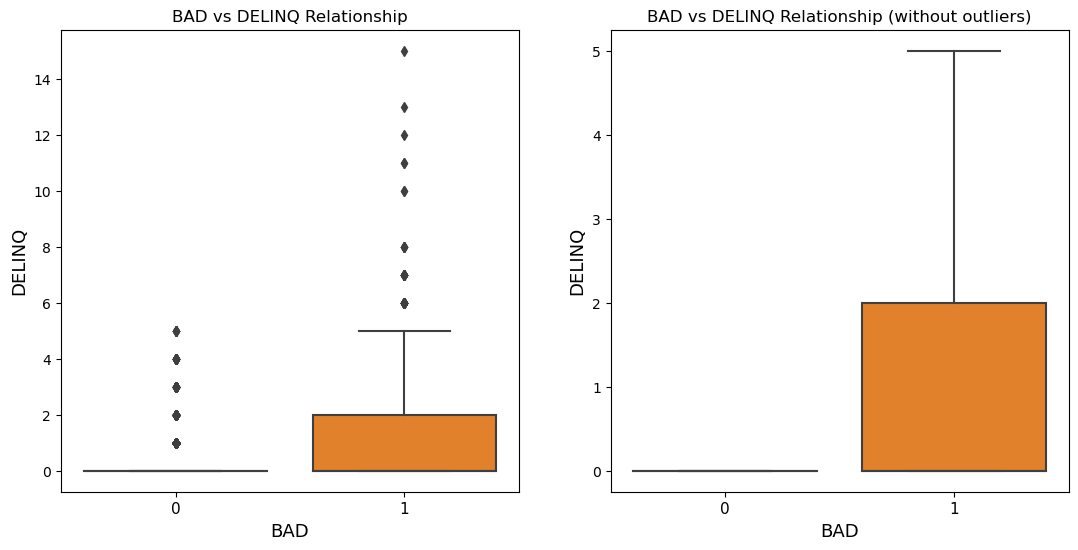

In [38]:
# Relationship between the BAD and DELINQ
boxplots(data, 'BAD', 'DELINQ')

**Observations:**
* Defaulters clients have higher numbers of delinquent credit lines.
* 75% of the defaulters clients (~892 out of 1189) have 2  or less DELINQ, whereas almost 100% of the clients who have repaid their loans do not have any DELINQ.
* This variable may not be informative for the model, to be confirmed with a Decision Tree and Random Forest varibales importance.

##### G. BAD vs CLAGE (Age of the oldest credit line in months)

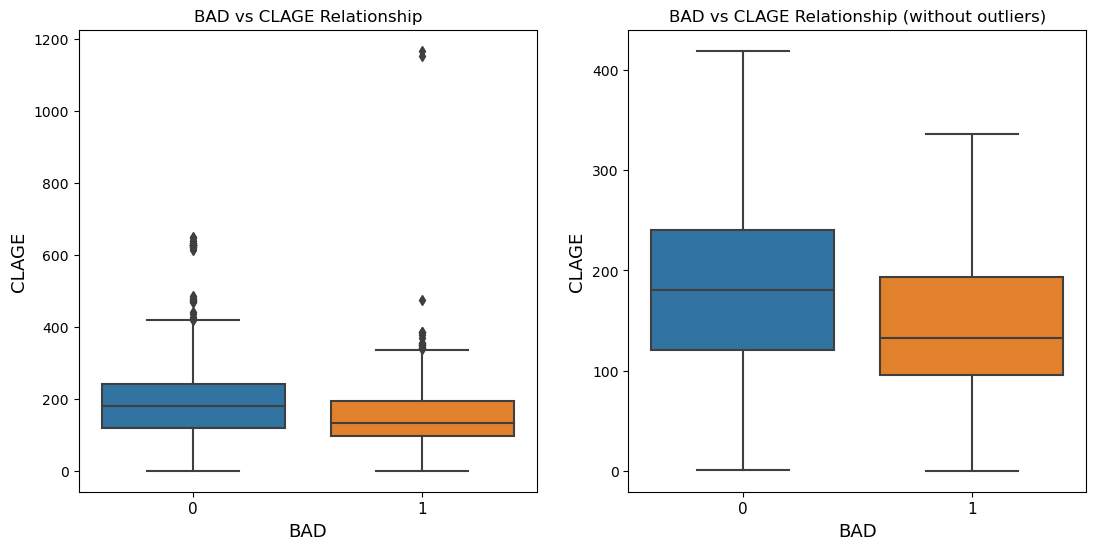

In [39]:
# Relationship between the BAD and CLAGE
boxplots(data, 'BAD', 'CLAGE')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in oldest credit lines. However, in the defaulters clients, there are a few outliers at ~1150 months. 
* The median of client's CLAGE who defaulted is lower than the repaid loans.  
* Therefore, on average, clients who have longer credit histories are more likely to repay their loans.

##### H. BAD vs NINQ (Number of recent credit inquiries)

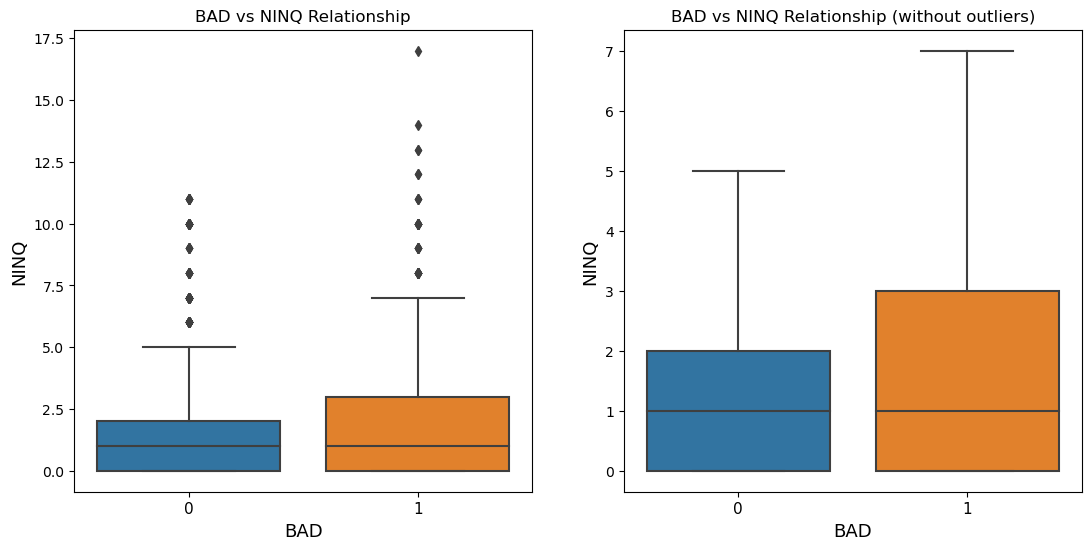

In [40]:
# Relationship between the BAD and NINQ
boxplots(data, 'BAD', 'NINQ')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in numbers of recent credit inquiries. 
* The median is equal to 1 in both cases. However, the 3rd quantile varies by 1 NINQ and it is higher for defaulters at 3.  
* It seems that the number of recent credit inquiries has a small influence in if the loan is repaid or not.

##### I. BAD vs CLNO (Number of existing credit lines)

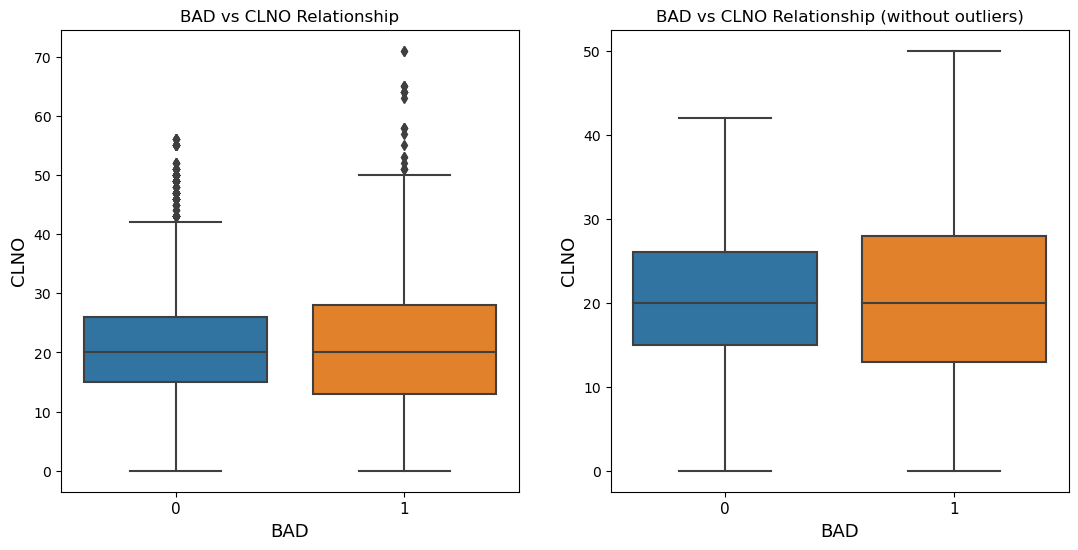

In [41]:
# Relationship between the BAD and CLNO
boxplots(data, 'BAD', 'CLNO')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in number of existing credit lines. 
* The median is equal to 20 in both cases. However, the 1st and 3rd quantile vary.
    * 50% of the clients who have repaid their loans are between 15 and 26 CLNO.
    * 50% of the delfault clients are between 13 and 28 CLNO.
* It seems that the number of recent credit inquiries has a small influence in if the loan is repaid or not.

##### J. BAD vs DEBTINC (Debt-to-income ratio)

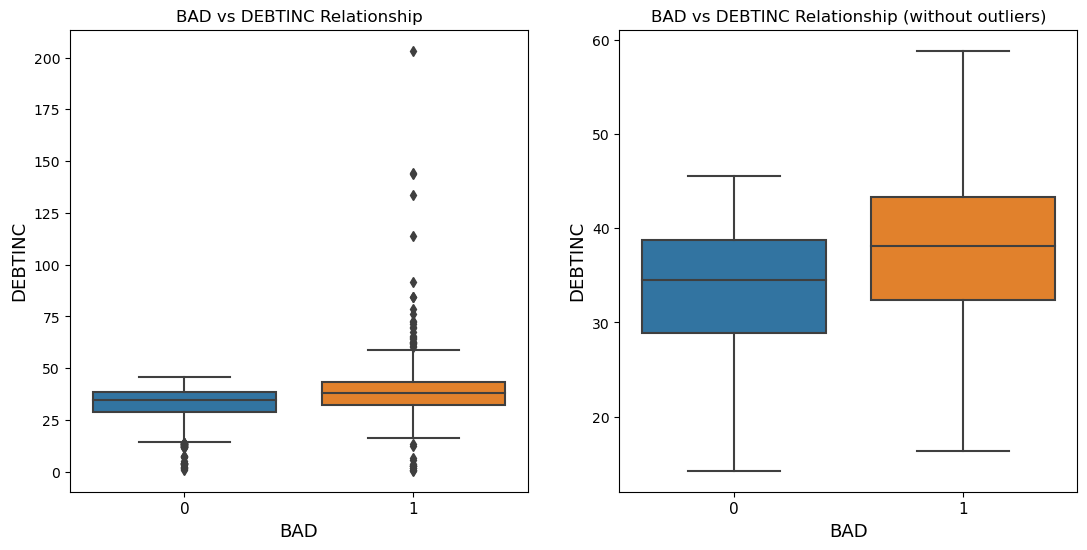

In [42]:
# Relationship between the BAD and DEBTINC
boxplots(data, 'BAD', 'DEBTINC')

**Observations:**
* Regardless if the clients defaulted or not, there are outliers in the debt-to-income ratio. However, in the defaulters clients, have extreme values that are low and high whereas, the repaid loans clients only have extreme low values. 
* The median of client's DEBTINC who defaulted is higher than the repaid loans.  
* Therefore, on average, clients who have lower debt-to-income ratio are more likely to repay their loans.

### **Bivariate Analysis:  BAD vs Categorical Variables**

In [43]:
# Function to plot stacked bar plots and bar graph plots

def plot_stacked_and_count(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """  
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    plt.figure(figsize=(6,1))
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True)

    # Adding labels and legend
    plt.xlabel(predictor, fontsize=11)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot: {predictor} vs {target}')
    plt.xticks(rotation=45, fontsize=9)
    plt.show()

    print("-" * 120)
    
    # Count plot using seaborn
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=predictor, hue=target)

    # Adding labels and legend
    plt.xlabel(predictor, fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.xticks(fontsize=9)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Count Plot: {predictor} vs {target}')
    plt.show()

##### A. BAD vs REASON (Reason for the loan request)

BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

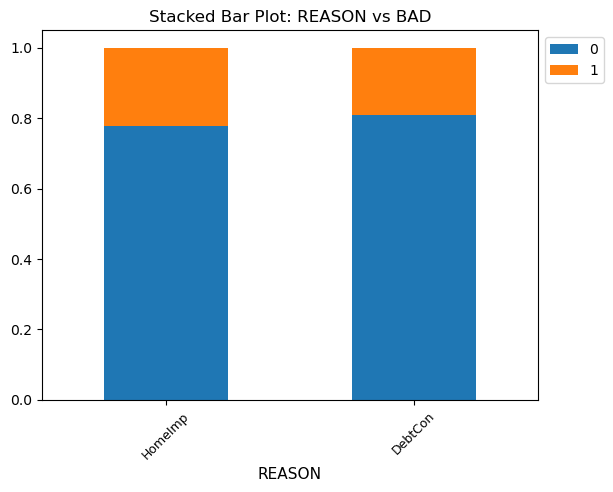

------------------------------------------------------------------------------------------------------------------------


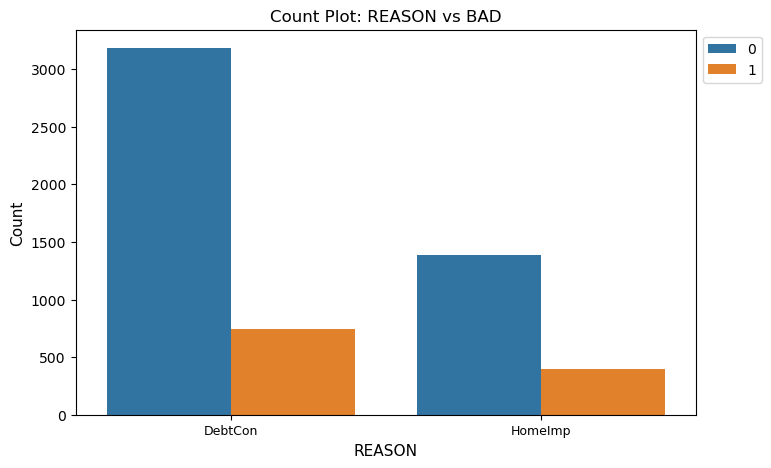

In [44]:
# Relationship between the BAD and REASON
plot_stacked_and_count(data, 'REASON', 'BAD')

**Observations:**
*  Clients having chosen the debt consolidation (Debtcon) reason is almost 1.5 times higher.
* There are more defaulter in Debtcon (745 clients) than in HomeImp (396 clients).
* However, clients having requested a loan for home improvement (HomeImp) have a slightly higher chance to be defaulters by 3%.

##### B. BAD vs JOB (Type of job)

BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x100 with 0 Axes>

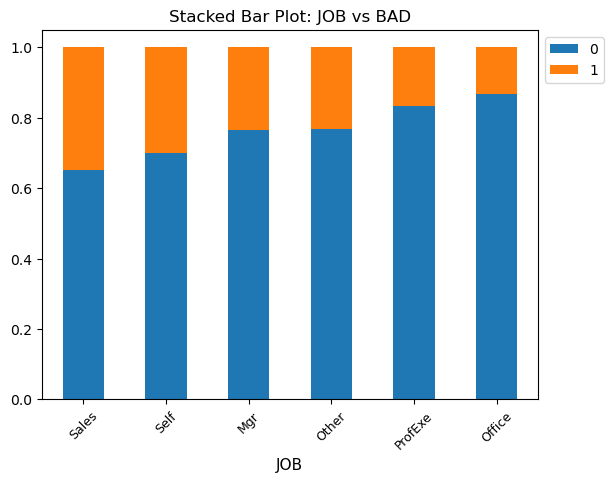

------------------------------------------------------------------------------------------------------------------------


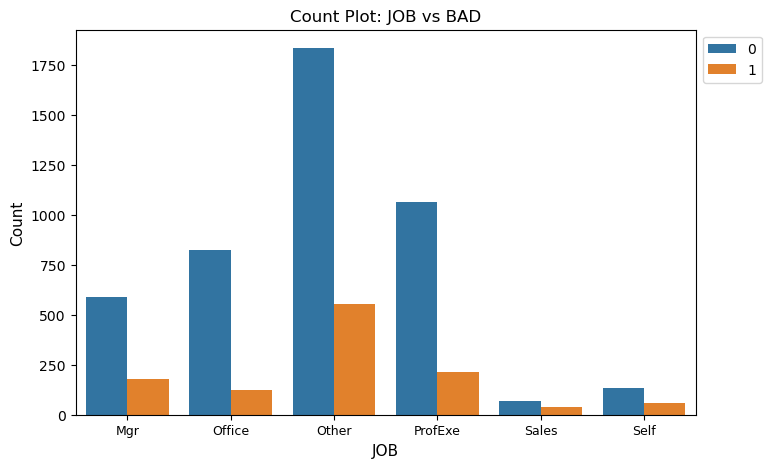

In [45]:
# Relationship between the BAD and JOB
plot_stacked_and_count(data, 'JOB', 'BAD')

**Observations:**
* Out of 767 clients who are managers, 179 are defaulters, which represent ~23.33%.
* Out of 948 clients who work in an office, 125 are defaulters, which represent ~13.19%.
* Out of 2388 clients who have entered 'other', 554 are defaulters, which represent ~23.20%.
* Out of 1276 clients who have professional or executive positions, 212 are defaulters, which represent ~16.61%.
* Out of 107 clients who are in sales, 38 are defaulters, which represent ~35.51%.
* Out of 193 clients who are self employed, 58 are defaulters, which represent ~30.05%.
* If the clients are self employed or in sales, they have a slightly higher chance to be defaulters.
* If the clients works in an office, they have a less chance to be defaulters.

### **Multivariate Analysis**

##### A. Pair plot 
Instead of plotting a scatterplot for each two numerical variable on a two-dimensional plane, let's plot a pair plot, which is a collection of scatter plots arranged in a matrix format, allowing simultaneous examination. 

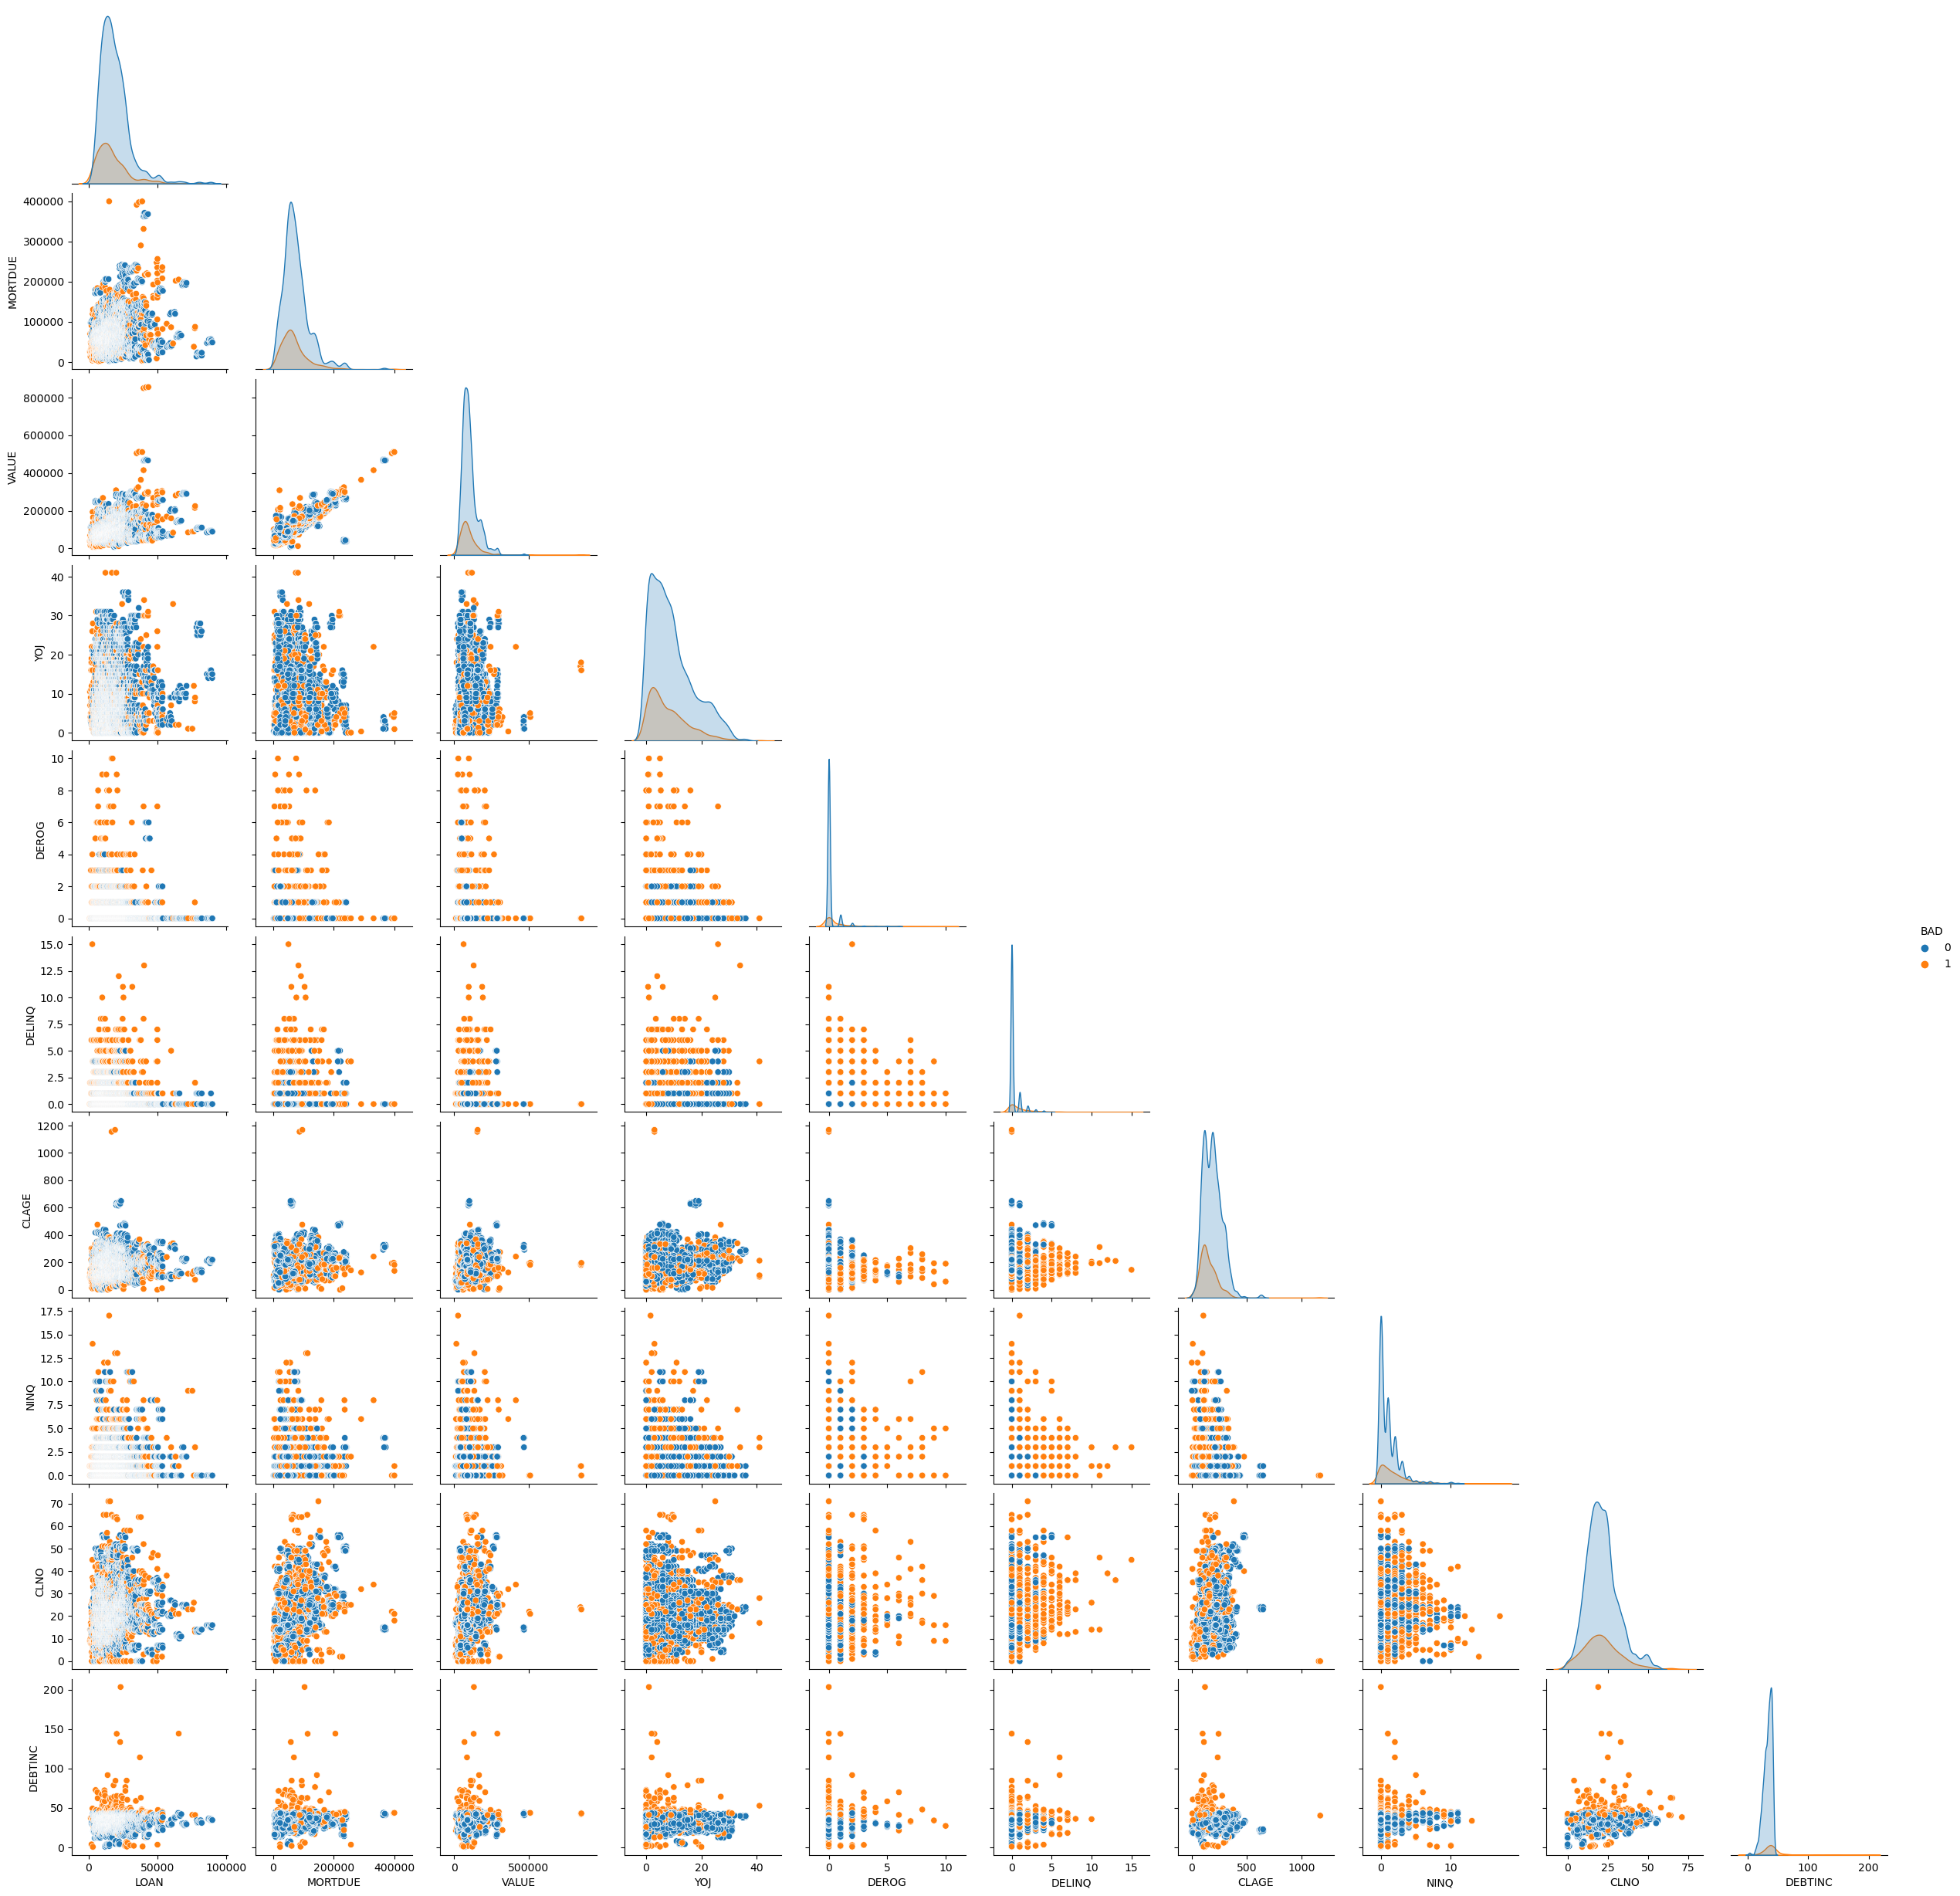

In [46]:
# Plotting a pair plot for all numerical variables
sns.pairplot(data, hue='BAD', diag_kind='kde', markers='o', corner=True)
plt.show()

**Legend**:
* Blue: Repaid loan
* Orange: Default loan

**Observations:**
* There is a positive correlation between 'MORTDUE' and 'VALUE'.
* The loan amount reveals that the presence of defaulters is across different loan amount as the distributions of both bad categories are mixed.
* Variables that seems to show no linear correlations:
    * Years at present job (YOJ)
    * Number of delinquent credit lines (DELINQ)
    * Number of recent credit inquiries (NINQ)
    * Number of existing credit lines (CLNO)   
* The debt-to-income ratio (DEBINC) varies across the dataset.
* The pairplot also shows that clients who have recieved high derogatory reports or high number of delinquent credits lines are more likely to default.

##### B. Correlation among numerical variables

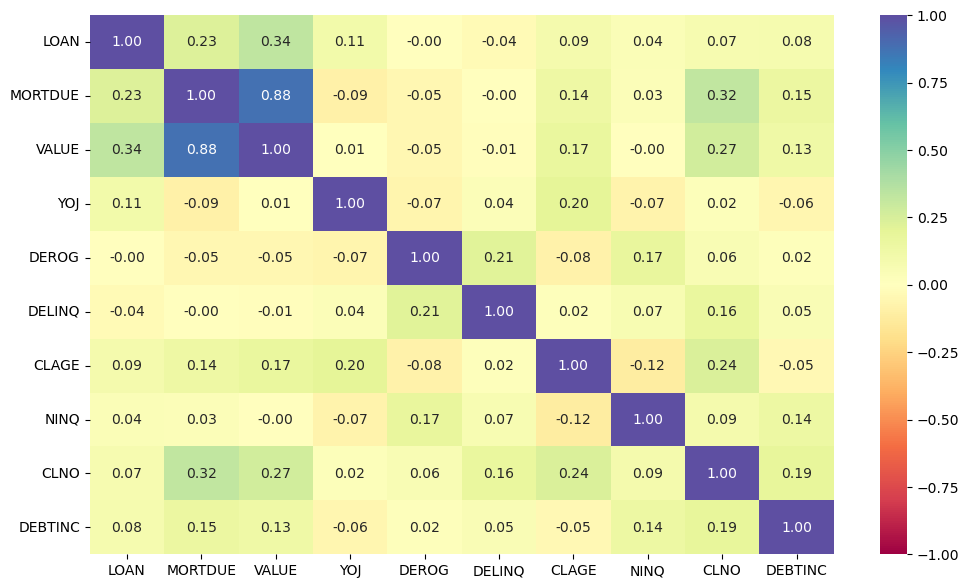

In [47]:
# Finding the correlation between various columns of the dataset

# Selecting only the numerical variable (.select_dtypes())
num_col = data.select_dtypes(include=np.number).columns.tolist()

# Plotting a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
* The heatmap confirms the very strong positive correlation of 0.88 between 'MORTDUE' and 'VALUE', seen in the pair plot. This correlation is expected as current value of the property ("VALUE") and the amount due on the existing mortgage ("MORTDUE") are closely related.
* There are 7 moderate positive correlations, between 0.20 and 0.34:
    * 'VALUE' and 'LOAN': 0.34
    * 'CLNO' and 'MORTDUE': 0.32
    * 'CLNO' and 'VALUE': 0.27
    * 'CLNO' and 'CLAGE': 0.24
    * 'MORTUE' and 'LOAN': 0.23
    * 'DELINQ' and 'DEROG': 0.21
    * 'CLAGE' and 'YOJ': 0.20
* All the rest of the correlations are either weak positive or weak negative correlations.

## Treating Outliers

In [48]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [49]:
# Creating a copy data with the outliers treated
data_raw = data.copy()

# getting list of numerical columns from data_raw
num_col2 = data_raw.select_dtypes(include=np.number).columns.tolist()

data = treat_outliers_all(data_raw,num_col2)

## Treating Missing Values

#### Adding new columns in the dataset for each column which has missing values allow us to keep track of where the missing vsalues were in the original dataset.

In [50]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(data,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    data[new_col] = data[col].isna()
    return data

In [51]:
# list of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for column in missing_col:
    add_binary_flag(data,column)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [52]:
# Select numeric columns and their data.
num_data = data.select_dtypes('number')

# Recallthe list of all categoriacl columns created earlier (cat_col)
cat_col = data.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_col:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

* The dataset has 5960 observations and 13 columns (10 numeric, 3 categorical).
* The target 'BAD' is a binary variable (0 or 1).
* Most columns have missing values and their distributions are positively skewed 
* Defaulted clients represent 19.9% of all the approved loans.
* The median of 'LOAN', 'MORTDUE', and 'VALUE' are lower for defaulters compared to non-defaulters.
* Defaulted clients have higher number of deterogatory reports and delinquent credit lines.
* The debt-to-income ratio is higher for defaulters, which indicates their inability to repay the loan.
* Clients having requested a loan for home improvement (HomeImp) have a slightly higher chance to be defaulters by 3%.
* There are only 6 different job categories. Therefore, the most frequent job is specified as "Other".
* There is a very strong positive correlation of 0.88 between the amount due on the existing mortages (MORTDUE) and the current value of the property (VALUE).
* Looking at the strong and moderate positive correlation, it seems that the variables 'VALUE', 'LOAN', 'MORTDUE', 'CLNO', 'CLAGE', and 'YOJ' are important and therefore, they may impact the modeling and prediction of lan defaults.

# **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## **Data Preparation for Modeling**

In [53]:
# Separating the target variable (BAD) and other variables

# X a copy dataframe with the 'BAD' column removed 
X = data.drop(columns = 'BAD')

# Y is a series containing the "status" (column) -> the dependent targeted variable
Y = data['BAD']

# Creating dummy variables for X
# drop_first=True is used to avoid redundant variables
# pd.get_dummies function converts all categorical variables in X into binary 1(True) / 0(False)
X =pd.get_dummies(X, drop_first=True)

In [54]:
X.head()

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ  CLAGE  NINQ  CLNO  DEBTINC  \
0  1100 25860.00  39025.00 10.50   0.00    0.00  94.37  1.00  9.00    34.82   
1  1300 70053.00  68400.00  7.00   0.00    0.00 121.83  0.00 14.00    34.82   
2  1500 13500.00  16700.00  4.00   0.00    0.00 149.47  1.00 10.00    34.82   
3  1500 65019.00  89235.50  7.00   0.00    0.00 173.47  1.00 20.00    34.82   
4  1700 97800.00 112000.00  3.00   0.00    0.00  93.33  0.00 14.00    34.82   

   MORTDUE_missing_values_flag  VALUE_missing_values_flag  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                         True                       True   
4                        False                      False   

   REASON_missing_values_flag  JOB_missing_values_flag  \
0                       False                    False   
1                       False                    False   
2                       False                    False   
3                        True                     True   
4                       False                    False   

   YOJ_missing_values_flag  DEROG_missing_values_flag  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                     True                       True   
4                    False                      False   

   DELINQ_missing_values_flag  CLAGE_missing_values_flag  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                        True                       True   
4                       False                      False   

   NINQ_missing_values_flag  CLNO_missing_values_flag  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                      True                      True   
4                     False                     False   

   DEBTINC_missing_values_flag  REASON_HomeImp  JOB_Office  JOB_Other  \
0                         True            True       False       True   
1                         True            True       False       True   
2                         True            True       False       True   
3                         True           False       False       True   
4                         True            True        True      False   

   JOB_ProfExe  JOB_Sales  JOB_Self  
0        False      False     False  
1        False      False     False  
2        False      False     False  
3        False      False     False  
4        False      False     False

In [55]:
# Splitting the dataset into train and test datasets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [56]:
# Checking the shape of the train and test data
print('Shape of Training set: ', X_train.shape)
print('Shape of Test set: ', X_test.shape)
print("-" * 50)
print('Percentage of classes in Training set:')
print(y_train.value_counts(normalize=True))
print("-" * 50)
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set:  (4172, 27)
Shape of Test set:  (1788, 27)
--------------------------------------------------
Percentage of classes in Training set:
BAD
0   0.80
1   0.20
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in test set:
BAD
0   0.79
1   0.21
Name: proportion, dtype: float64


In [57]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Default', 'Default'], yticklabels = ['Not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression Model
We will use the logistic regression method as it is used for binary classification. It models the probability of a binary outcome by fitting data to a logistic function. 

Separating the target variable y and independent variable x, and splitting the data into training and test dataset was done in the "Data Preparation for Modeling" section.

In [58]:
# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Checking model performance on training dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.69      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.75      0.51      0.47      4172
weighted avg       0.78      0.81      0.73      4172



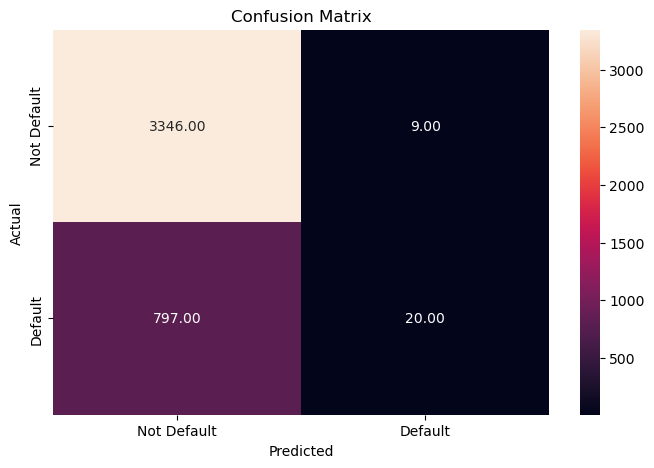

In [59]:
# Predict on the training dataset
y_train_pred_log_reg = logistic_model.predict(X_train)

# Evaluate the performance on the training dataset
metrics_score(y_train, y_train_pred_log_reg)

**Observations:**
* All 4172 observations have been classified, therefore there is no error on the training dataset.
* This model seems to perform well in classifying clients who will repay their loans. 3346 clients were classified as actual positive, which represent ~80%.
* However, it seems to struggle to identify the defaulters (~0.48%) as the recall is very low (0.02).
* The low recall could be due to class imbalance that needs to be addressed so this issue could improve the model's performance.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.43      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.61      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



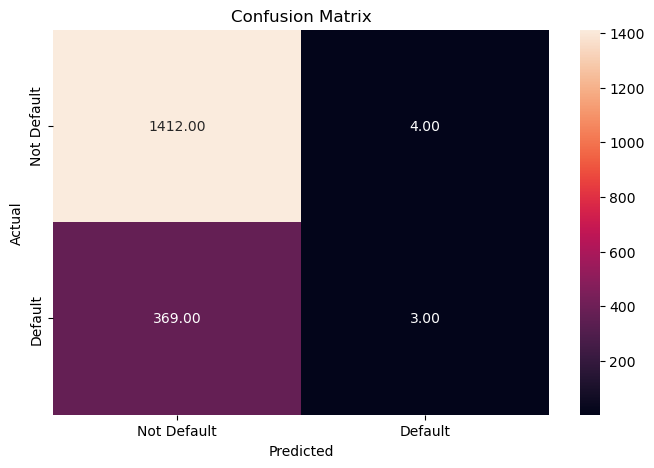

In [60]:
# Predict on the test dataset
y_test_pred_log_reg = logistic_model.predict(X_test)

# Evaluate the performance on the test set
metrics_score(y_test, y_test_pred_log_reg)

**Observations:**
* All 1788 observations have been classified, therefore there is no error on the testing dataset.
* This model seems to perform well in classifying clients who will repay their loans. 1412 clients were classified as actual positive, which represent ~79%.
* However, it seems to struggle to identify the defaulters (~0.17%) as the recall is very low (0.01).
* The low recall could be due to class imbalance that needs to be addressed so this issue could improve the model's performance.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [61]:
# Printing the coefficients of logistic regression
with pd.option_context('display.float_format', '{:.6f}'.format):
    coef = pd.DataFrame(logistic_model.coef_, columns=X.columns).T.sort_values(by=0, ascending=False)
    print(coef)

                                    0
DEBTINC                      0.020758
CLNO                         0.007849
NINQ                         0.004581
DEBTINC_missing_values_flag  0.004216
VALUE_missing_values_flag    0.000671
JOB_Self                     0.000183
REASON_HomeImp               0.000170
JOB_Sales                    0.000131
CLAGE_missing_values_flag    0.000110
JOB_Other                    0.000088
CLNO_missing_values_flag     0.000018
REASON_missing_values_flag   0.000008
DEROG                        0.000000
DELINQ                       0.000000
VALUE                       -0.000001
MORTDUE                     -0.000005
LOAN                        -0.000027
MORTDUE_missing_values_flag -0.000104
JOB_ProfExe                 -0.000189
YOJ_missing_values_flag     -0.000281
NINQ_missing_values_flag    -0.000316
JOB_missing_values_flag     -0.000359
DELINQ_missing_values_flag  -0.000421
JOB_Office                  -0.000474
DEROG_missing_values_flag   -0.000522
YOJ         

**Observations:**
* The logistic regression doesn't give many variable any importance as they are all close to zero or negative.
* 'DEBTINC' and 'NINQ' have the highest coefficient, predicting that based on debt-to-income ratio and/or number of recent credit inquiries the client could default.

## Building a Decision Tree Model

Separating the target variable y and independent variable x, and splitting the data into training and test dataset was done in the "Data Preparation for Modeling" section.

In [62]:
# Defining the Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree = DecisionTreeClassifier(random_state = 1, class_weight={0: 0.2, 1: 0.8})

# Fitting the decision tree classifier on the training data
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking model performance on training dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



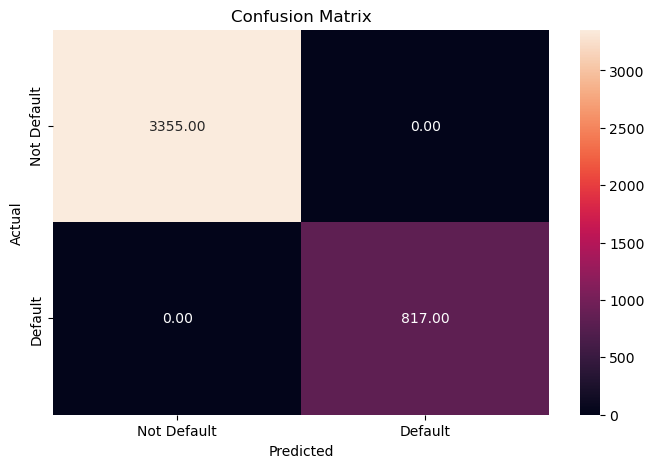

In [63]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:**
* All 4172 observations have been classified, therefore there is no error on the training set.
* The recall = 1, which is the maximum. This also means there is a higher chance at minimizing False Negatives.
* The precision = 1, which is the maximum.
* A perfect recall and precision suggest that the model is mostly likely overfitting the training data. 

#### Checking test data performance to see if the model is overfitting

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1416
           1       0.68      0.56      0.62       372

    accuracy                           0.85      1788
   macro avg       0.79      0.75      0.76      1788
weighted avg       0.85      0.85      0.85      1788



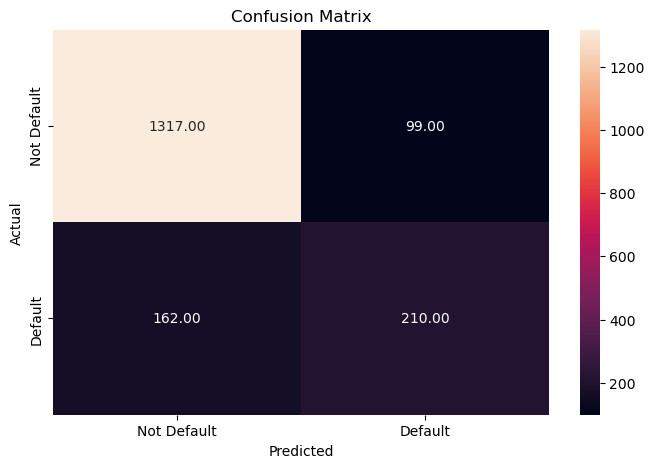

In [64]:
# Checking test dataset performance
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:**
* True 'Not Default' represent ~73.66%, with 1317 clients.
* True 'Default' represent ~11.75%, with 210 clients.
* False 'Default' (model predict default but client did not) represent ~5.54%, with 99 clients.
* False 'Not Default' (model predict not default but client have default) represent ~9.06%, with 162 clients.
* The Decision Tree works well on the training data but not as well on the test data as the recall is 0.75 in comparaison to 1 for the training data. This confirms that the Decision Tree is overfitting the training data.

**Can we improve the model with Hyperparameter Tuning?**

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [65]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1,2,5,7,10]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the GridSearch on the train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=8,
                       min_samples_leaf=5, random_state=1)

* The model was tuned and been fitted on the training data.

#### Checking model performance on tuned training dataset

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3355
           1       0.64      0.83      0.73       817

    accuracy                           0.88      4172
   macro avg       0.80      0.86      0.82      4172
weighted avg       0.89      0.88      0.88      4172



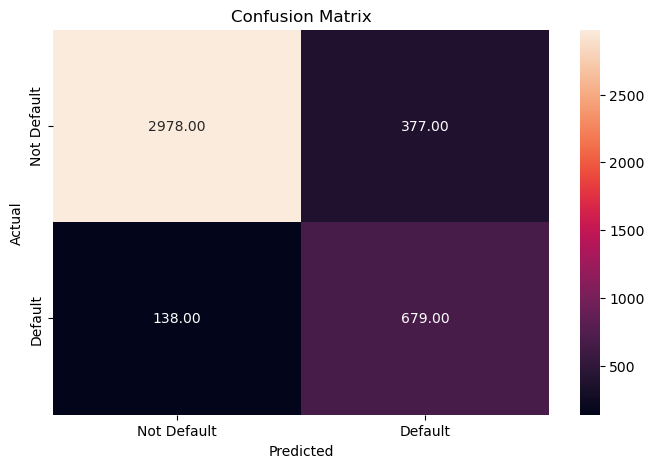

In [66]:
# Checking model performance on tuned training dataset
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**
* All 4172 observations have been classified, therefore there is no error on the training set.
* This model is able to identify the majority of loan repaid, which is 2978 observations (~71.38%).
* True 'Default' represent ~16.28%, with 679 clients.
* False 'Default' (model predict default but client did not) represent ~9.04%, with 377 clients.
* False 'Not Default' (model predict not default but client have default) represent ~3.31%, with 138 clients.

* Precision: The ability of the model to correctly identify positive instances among the predicted positives. For class 0, it's 0.96, and for class 1, it's 0.64.
* Recall (Sensitivity): The ability of the model to capture all the positive instances. For class 0, it's 0.89, and for class 1, it's 0.83.
* F1-score: The harmonic mean of precision and recall. It balances precision and recall. For class 0, it's 0.92, and for class 1, it's 0.73.
* Accuracy: Overall correctness of the model. In this case, it's 0.88.
* Macro Avg: The average of precision, recall, and F1-score across both classes. It provides an overall performance measure. Macro Avg F1-score is 0.82.
* Weighted Avg: The weighted average of precision, recall, and F1-score, weighted by the number of samples in each class. Weighted Avg F1-score is 0.88.

Overall, the model performs well for class 0 (not default) with high precision, recall, and F1-score. However, for class 1 (default), the precision and F1-score are lower, suggesting challenges in correctly identifying positive instances for this class.

#### Checking model performance on tuned test dataset

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1416
           1       0.64      0.75      0.69       372

    accuracy                           0.86      1788
   macro avg       0.78      0.82      0.80      1788
weighted avg       0.87      0.86      0.86      1788



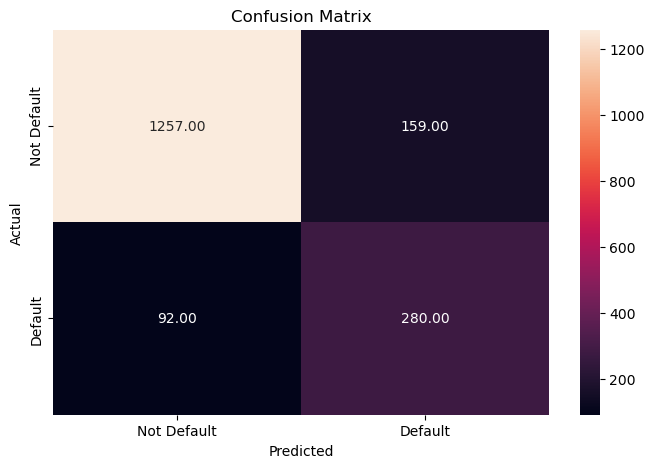

In [67]:
# Checking model performance on tuned test dataset
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**
* The tuned model metrics have slighty improved compared to the model with default parameters.
* True 'Not Default' represent ~70.30%, with 1257 clients.
* True 'Default' represent ~15.66%, with 280 clients.
* False 'Default' (model predict default but client did not) represent ~8.89%, with 159 clients.
* False 'Not Default' (model predict not default but client have default) represent ~5.15%, with 92 clients.

* The accuracy has increased lightly by 1%.
* The average precision has slighly decreased as well by 1%.
* The average recall has increased by 7% to be at 82%, which is slightly above the 0.78% of precision.
* The "Not Default" class has a precision of 0.93, recall of 0.89, and an F1-score of 0.91, indicating that the tuned decision tree performs well in correctly classifying instances of "Not default."
* There is still room for improvement, especially in precision and recall for class 1.

**Time to visualize the tuned decision tree and examine the tree's decision rules**

### Visualizing the Decision Tree

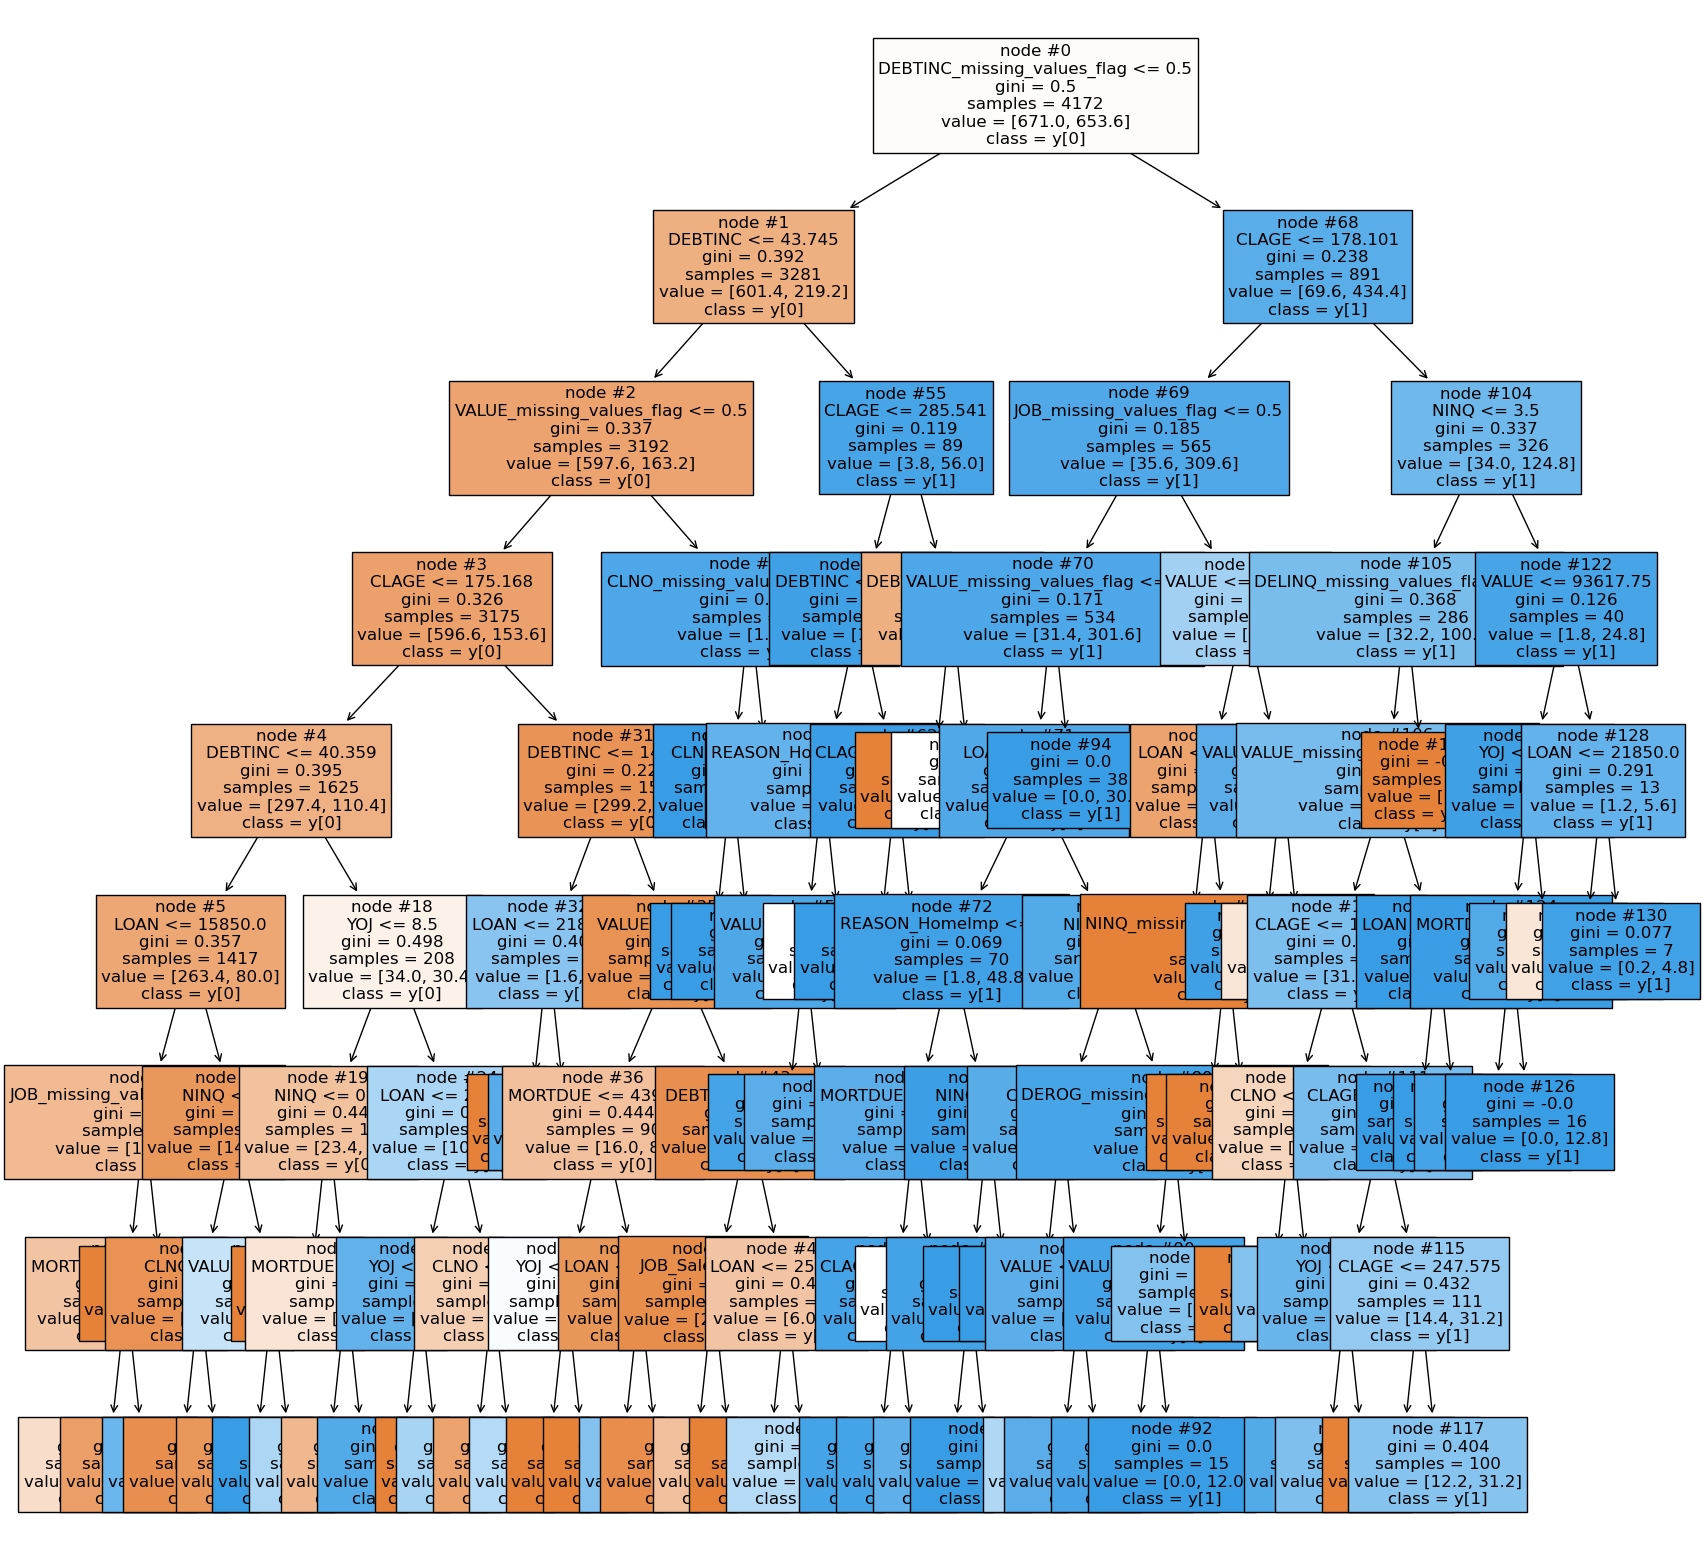

In [68]:
# Gathering all the columns for the X dataset into a list in a variable called features
features = list(X.columns)

# Plotting the decision tree (max_depth = 8)
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = ['y[0]', 'y[1]'])
plt.show()

**Observations:**

This decision tree with a max_depth=8, is hard to understand and interpret all the information given.

Therefore plotting another decision tree with a max_depth=4 will make the model simpler and more interpretable. Reducing max_depth helps prevent overfitting by creating a less complex tree that generalizes better to new, unseen data. This approach enhances model transparency and facilitates a clearer understanding of the underlying patterns in the data.

**Let's plot a decision tree with a max_depth = 4**

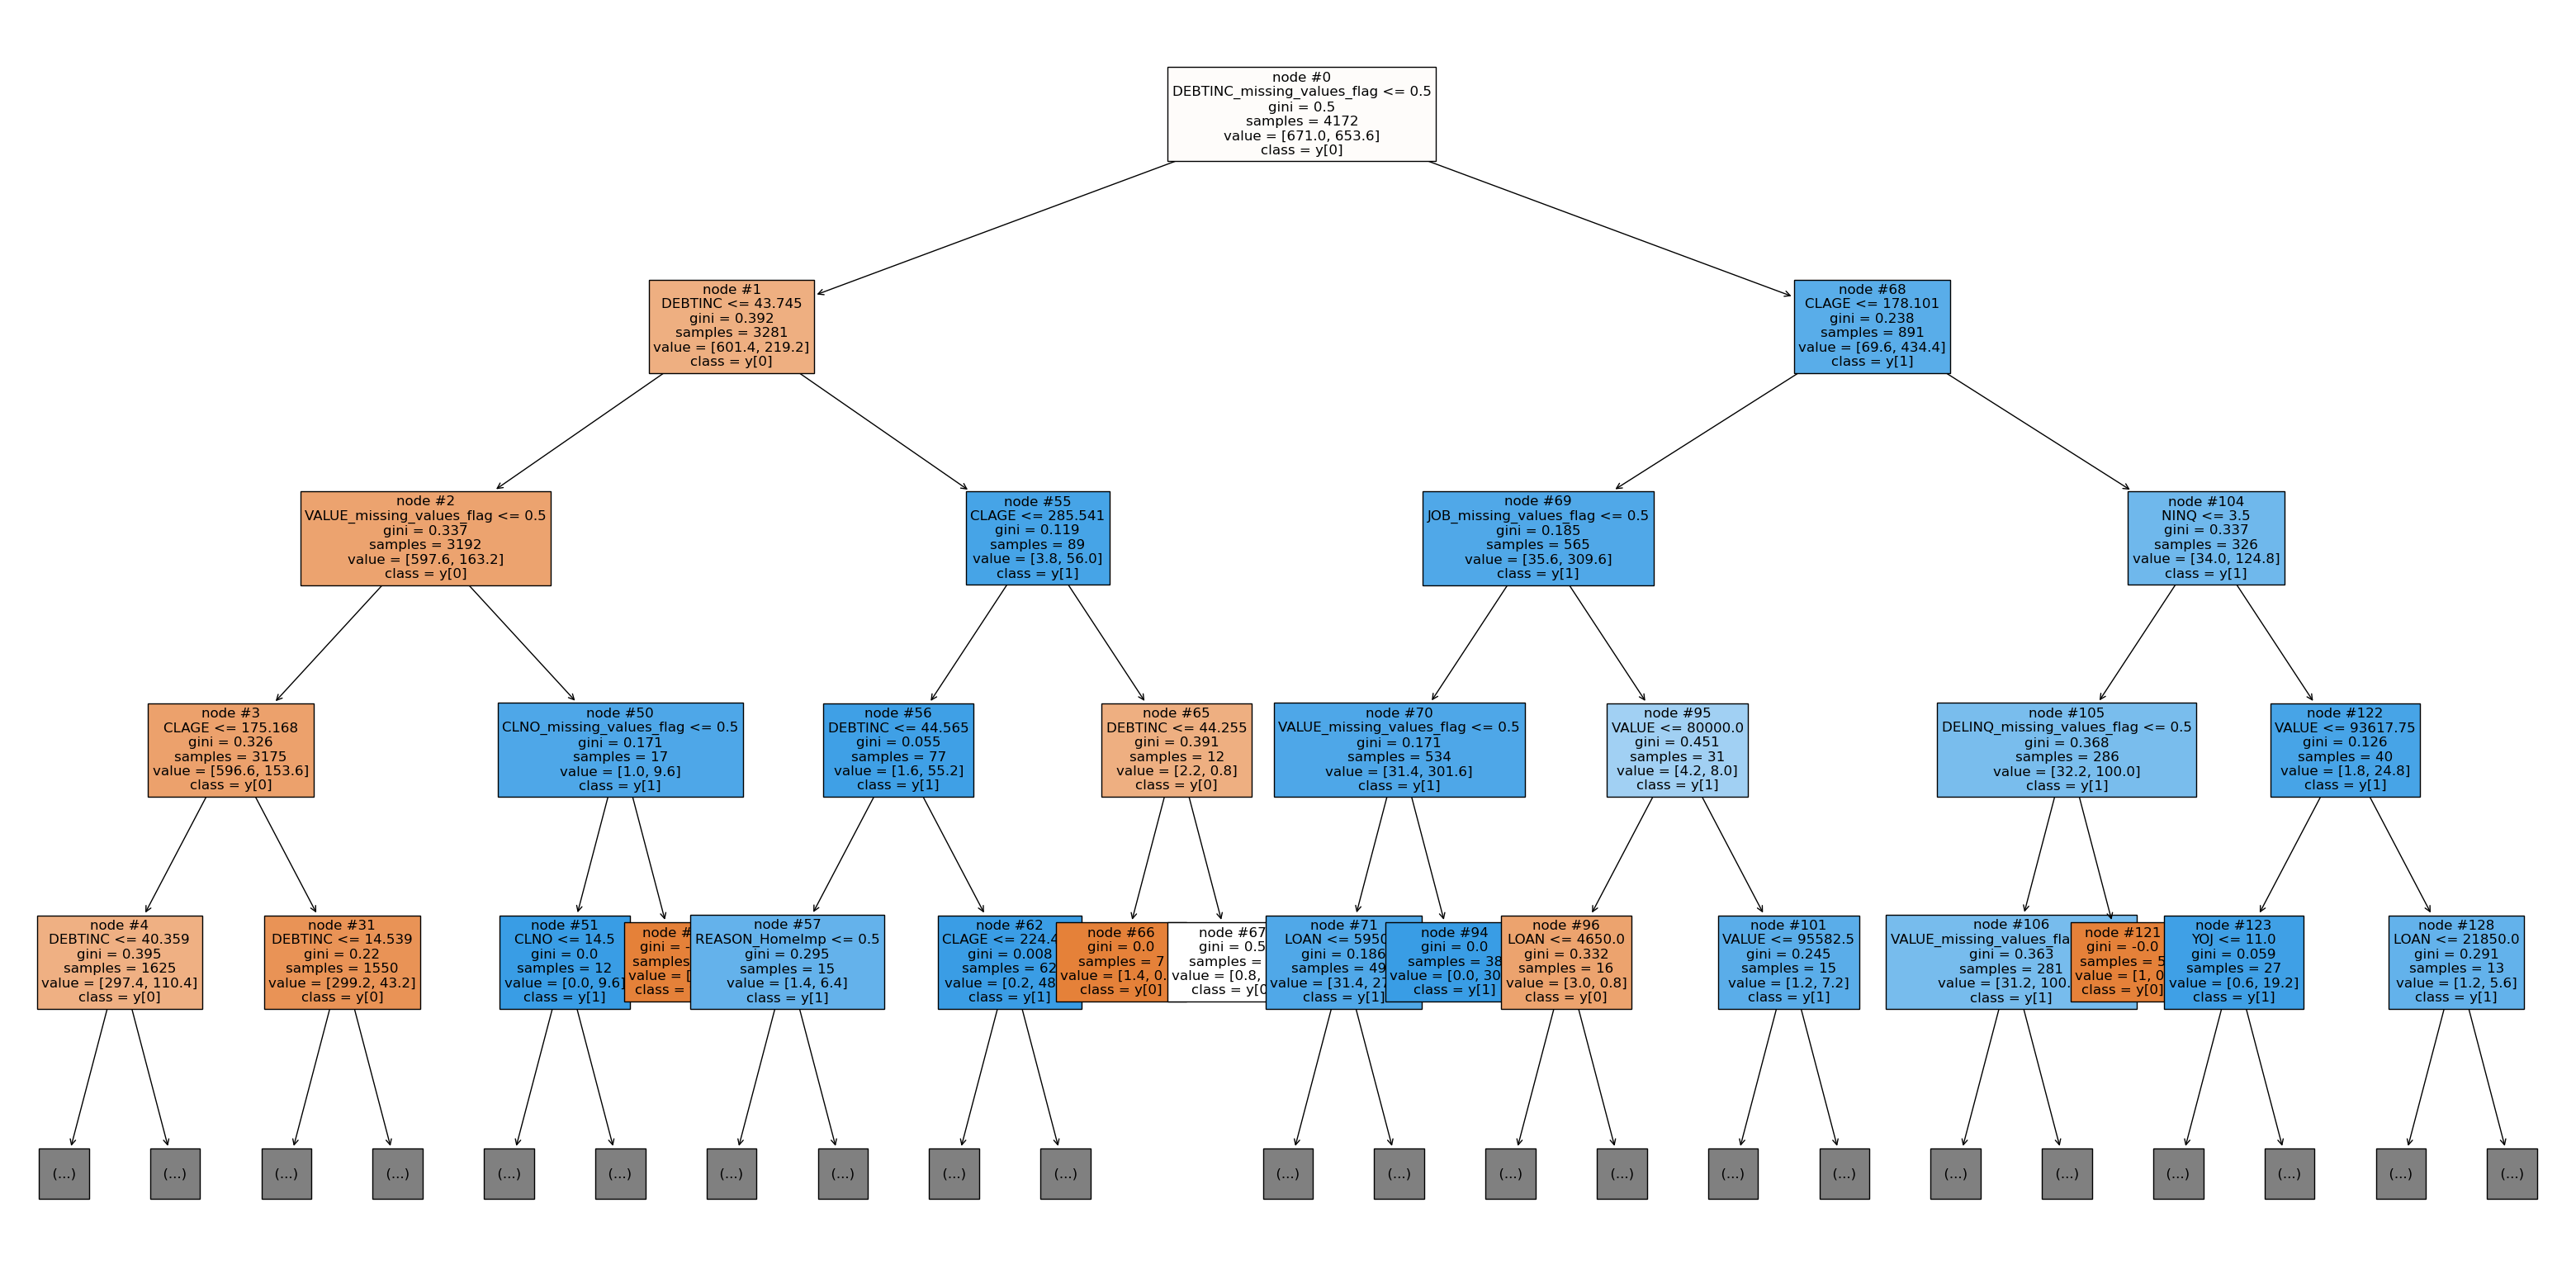

In [69]:
# Plotting the decision tree (max_depth = 4)
plt.figure(figsize = (40, 20))
tree.plot_tree(d_tree_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = ['y[0]', 'y[1]'])
plt.show()

**Legend**
* Blue leaves (class y[1]) represent the Default clients
* Orange leaves (class y[0]) represent the Not Default (loan repaid)
* The more the number of observations in a leaf, the darker its color gets

**Observations:**
- **Root Node:** DEBTINC_missing_value_flag <= 0.5. This is the starting point of the decision tree, which means that the missing information of debt-to-income ratio is in the highest information gain among all the features and is crucial in predicting loan defaults. If the value is less than or equal to 0.5, the left branch is taken, and if it is greater than 0.5, the right branch is taken.

- **Internal Nodes:** They are the intermediate nodes of the tree. Each node represents a decision based on a particular feature and a threshold value. Depending on the value of the feature, the tree follows the appropriate branch until it reaches a leaf node.

**Interpretations and Conclusions:**
* The decision tree starts with a slip on whether the DEBTINC_missing_values_flag is present or not. If a client has their DEBTINC missing in the dataset, the tree proceeds to consider their CLAGE (Age of the oldest credit line).
    * However, no matter their CLAGE value, the client is predicted to default on their loan.
* If a client has their DEBTINC inputed in the dataset, the tree proceeds to consider with this information, VALUE_missing_values_flag, and CLAGE.
    * If the client has a DETBINC superior to 43.745, it is predicted that the client will default unless their CLAGE is superior to 285.541 months, it is predicted that the client will repay their loan.
    * If the client has a DETBINC inferior to 43.745, it is predicted that the client will repay their loan unless their VALUE is missing in the dataset, it is predicted that the client will default.
* And the tree is continued to be read and interpreted, as at each nodes, the tree will predict if the client will default or not depending on the feature of that node.

- If the missing values in feature DEBTINC is superior or equal to 50%, then client is more likely to default.
- If the DEBTINC is inferior or equal to 43.745, the client is more likley to repay their loan.

**Look at the feature importance of the tuned decision tree model**

In [70]:
# Importance of features in the tree building
with pd.option_context('display.float_format', '{:.4f}'.format):
    print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
DEBTINC_missing_values_flag 0.5761
DEBTINC                     0.1823
CLAGE                       0.0451
LOAN                        0.0363
VALUE_missing_values_flag   0.0308
VALUE                       0.0271
NINQ                        0.0230
MORTDUE                     0.0193
CLNO                        0.0173
YOJ                         0.0171
JOB_missing_values_flag     0.0142
CLNO_missing_values_flag    0.0047
DELINQ_missing_values_flag  0.0030
REASON_HomeImp              0.0017
JOB_Sales                   0.0015
DEROG_missing_values_flag   0.0005
NINQ_missing_values_flag    0.0000
MORTDUE_missing_values_flag 0.0000
REASON_missing_values_flag  0.0000
DELINQ                      0.0000
YOJ_missing_values_flag     0.0000
CLAGE_missing_values_flag   0.0000
DEROG                       0.0000
JOB_Office                  0.0000
JOB_Other                   0.0000
JOB_ProfExe                 0.0000
JOB_Self                    0.0000


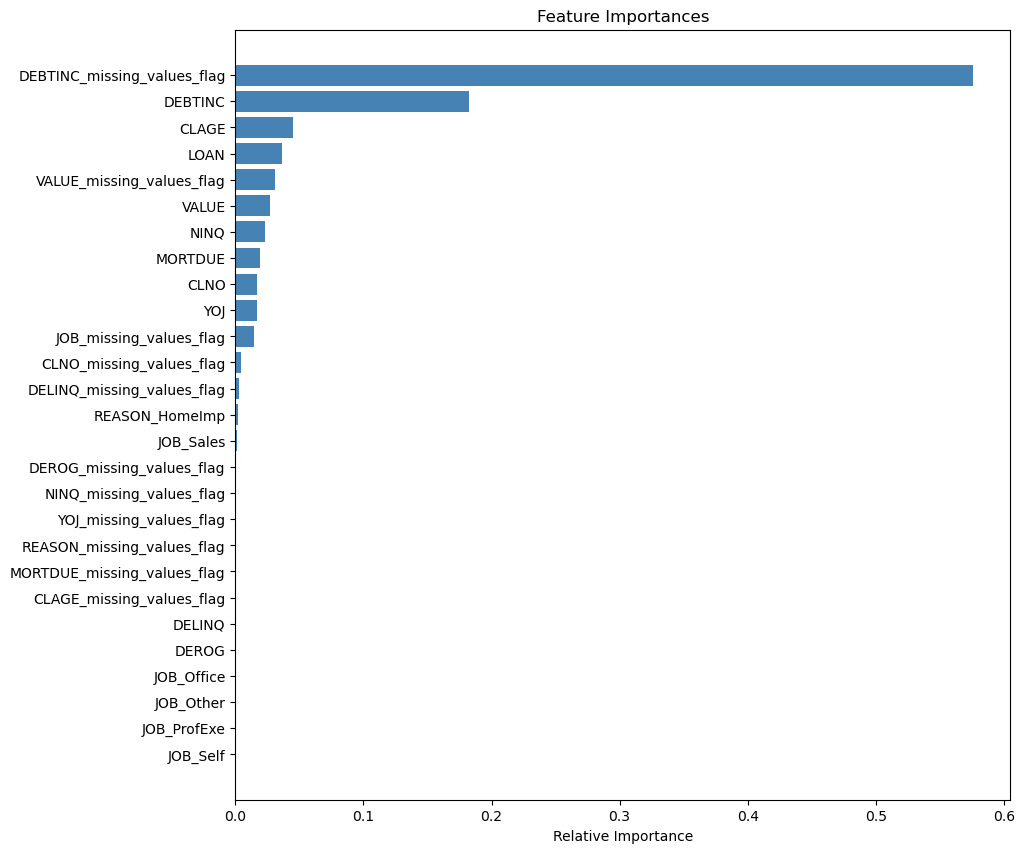

In [71]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'steelblue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* Most important features are:
    * DEBTINC_missing_values_flag: ~57.61%
    * DEBTINC: ~18.23%
* The 9 next features that are important to consider are:
    * CLAGE: ~4.51%
    * LOAN: ~3.63%
    * VALUE_missing_values_flag: ~3.03%
    * VALUE: ~2.71%
    * NINQ: ~2.30%
    * MORTDUE: ~1.93%
    * CLNO: ~1.73%
    * YOJ: ~1.71%
    * JOB_missing_values_flag: ~1.42%
* 5 other features have little importance (<1%)
    * CLNO_missing_values_flag: ~0.47%    
    * DELINQ_missing_values_flag: ~0.30%  
    * REASON_HomeImp: ~0.17%
    * JOB_Sales: ~0.15%
    * DEROG_missing_values_flag: ~0.05%
* The rest of the variables have no impact on this model when it comes to predicting if the client will default or not.

- The missing values in the DEBTINC feature significanlty influences the model's decision-making.
- The dept-to-income ration (DEBTINC) seems be a feature that model relies on for making predictions.
- Missing values in DEBTINC and VALUE features seems to play a substantial role in the model's predictions.

## **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [72]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator = RandomForestClassifier(random_state = 1, class_weight={0: 0.2, 1: 0.8})

# Fitting the random forest tree classifier on the training data
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking model performance on training dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



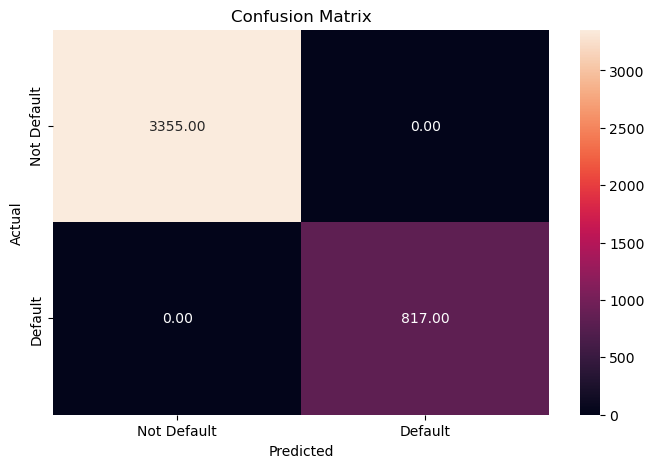

In [73]:
# Checking performance on the training dataset
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:**
* This confusion maxtrix is identical to the one given by the decision tree one with default parameters.
* All 4172 observations have been classified, therefore there is no error on the training set.
* The recall = 1, which is the maximum. This also means there is a higher chance at minimizing False Negatives.
* The precision = 1, which is the maximum.
* A perfect recall and precision suggest that the model is mostly likely overfitting the training data, like for the decision tree. 

#### Checking test data performance to see if the model is overfitting

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1416
           1       0.82      0.64      0.72       372

    accuracy                           0.90      1788
   macro avg       0.87      0.80      0.83      1788
weighted avg       0.89      0.90      0.89      1788



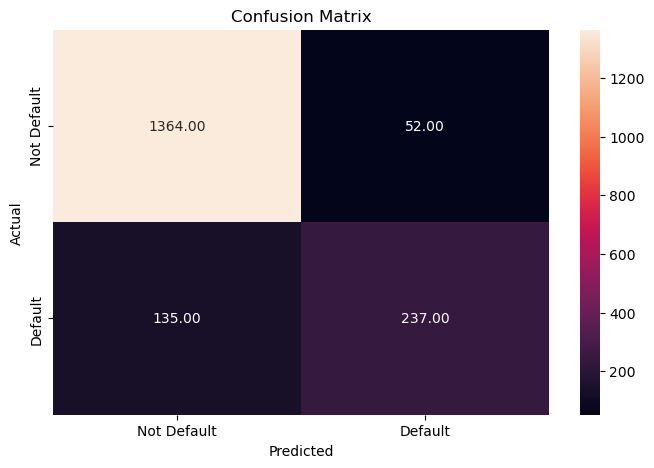

In [74]:
# Checking test data performance
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
* True 'Not Default' represent ~76.29%, with 1364 clients.
* True 'Default' represent ~13.28%, with 237 clients.
* False 'Default' (model predict default but client did not) represent ~2.91%, with 52 clients.
* False 'Not Default' (model predict not default but client have default) represent ~7.55%, with 135 clients.
* The Random Forest works well on the training data but not as well on the test data as the recall is 0.80 in comparaison to 1 for the training data. This confirms that the random forest is overfitting the training data.

**Can we improve the model with Hyperparameter Tuning?**

### **Random Forest Classifier Hyperparameter Tuning**

In [75]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(random_state = 1, class_weight={0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'n_estimators': [50, 100, 200],
    'max_depth': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5, 7, 10]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=10
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=10)

In [76]:
# Fitting the GridSearch on the train dataset
grid_obj = grid_obj.fit(X_train, y_train)

In [77]:
# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_leaf=2, n_estimators=50, random_state=1)

* The model was tuned and been fitted on the training dataset.

#### Checking model performance on tuned training dataset

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3355
           1       0.69      0.84      0.75       817

    accuracy                           0.89      4172
   macro avg       0.82      0.87      0.84      4172
weighted avg       0.90      0.89      0.90      4172



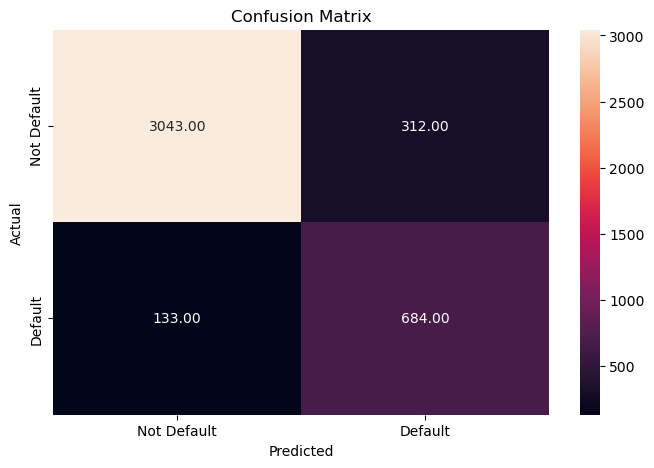

In [78]:
# Checking model performance on the tuned training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:**
* All 4172 observations have been classified, therefore there is no error on the training set.
* This model is able to identify the majority of loan repaid, which is 3043 observations (~72.94%).
* True 'Default' represent ~16.4%, with 684 clients.
* False 'Default' (model predict default but client did not) represent ~7.48%, with 312 clients.
* False 'Not Default' (model predict not default but client have default) represent ~3.19%, with 133 clients.

* Precision: The ability of the model to correctly identify positive instances among the predicted positives. For class 0, it's 0.96, and for class 1, it's 0.69.
* Recall (Sensitivity): The ability of the model to capture all the positive instances. For class 0, it's 0.91, and for class 1, it's 0.84.
* F1-score: The harmonic mean of precision and recall. It balances precision and recall. For class 0, it's 0.93, and for class 1, it's 0.75.
* Accuracy: Overall correctness of the model. In this case, it's 0.89.
* Macro Avg: The average of precision, recall, and F1-score across both classes. It provides an overall performance measure. Macro Avg F1-score is 0.84.
* Weighted Avg: The weighted average of precision, recall, and F1-score, weighted by the number of samples in each class. Weighted Avg F1-score is 0.90.

Overall, the model performs well for class 0 (not default) with high precision, recall, and F1-score. However, for class 1 (default), the precision and F1-score are lower, suggesting challenges in correctly identifying positive instances for this class.

#### Checking model performance on tuned test dataset

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1416
           1       0.69      0.75      0.72       372

    accuracy                           0.88      1788
   macro avg       0.81      0.83      0.82      1788
weighted avg       0.88      0.88      0.88      1788



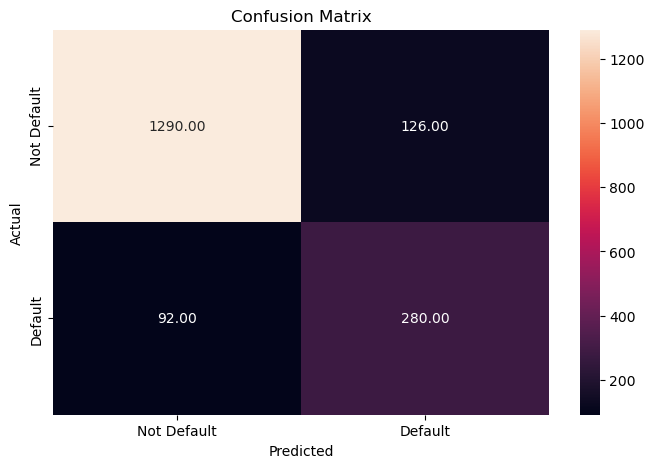

In [79]:
# Checking model performance on tuned test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
* All 1788 observations have been classified, therefore there is no error on the testing set.
* This model is able to identify the majority of loan repaid, which is 1290 observations (~72.15%).
* True 'Default' represent ~15.66%, with 280 clients.
* False 'Default' (model predict default but client did not) represent ~7.05%, with 126 clients.
* False 'Not Default' (model predict not default but client have default) represent ~5.15%, with 92 clients.

* Precision: The ability of the model to correctly identify positive instances among the predicted positives. For class 0, it's 0.93, and for class 1, it's 0.69.
* Recall (Sensitivity): The ability of the model to capture all the positive instances. For class 0, it's 0.91, and for class 1, it's 0.75.
* F1-score: The harmonic mean of precision and recall. It balances precision and recall. For class 0, it's 0.92, and for class 1, it's 0.72.
* Accuracy: Overall correctness of the model. In this case, it's 0.88.
* Macro Avg: The average of precision, recall, and F1-score across both classes. It provides an overall performance measure. Macro Avg F1-score is 0.82.
* Weighted Avg: The weighted average of precision, recall, and F1-score, weighted by the number of samples in each class. Weighted Avg F1-score is 0.88.

Overall, the model performs well for class 0 (not default) with high precision, recall, and F1-score. However, for class 1 (default), the precision and F1-score are lower, suggesting challenges in correctly identifying positive instances for this class.

Ensemble models does not allow an interpretation of the model. This means we cannot observe the decision rules for random forests the way we saw for decision trees.
Therefore, we will check the feature importance of the model.

**Look at the feature importance of the tuned random forest model**

In [80]:
# Importance of features in the tuned random forest
with pd.option_context('display.float_format', '{:.4f}'.format):
    print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
DEBTINC_missing_values_flag 0.3341
DEBTINC                     0.2439
CLAGE                       0.0795
VALUE                       0.0499
LOAN                        0.0461
CLNO                        0.0392
MORTDUE                     0.0381
NINQ                        0.0376
VALUE_missing_values_flag   0.0345
YOJ                         0.0320
DEROG_missing_values_flag   0.0103
JOB_missing_values_flag     0.0072
JOB_Other                   0.0061
DELINQ_missing_values_flag  0.0057
JOB_Office                  0.0051
REASON_HomeImp              0.0049
JOB_ProfExe                 0.0045
YOJ_missing_values_flag     0.0043
CLNO_missing_values_flag    0.0034
MORTDUE_missing_values_flag 0.0028
REASON_missing_values_flag  0.0026
CLAGE_missing_values_flag   0.0025
JOB_Sales                   0.0023
JOB_Self                    0.0019
NINQ_missing_values_flag    0.0016
DELINQ                      0.0000
DEROG                       0.0000


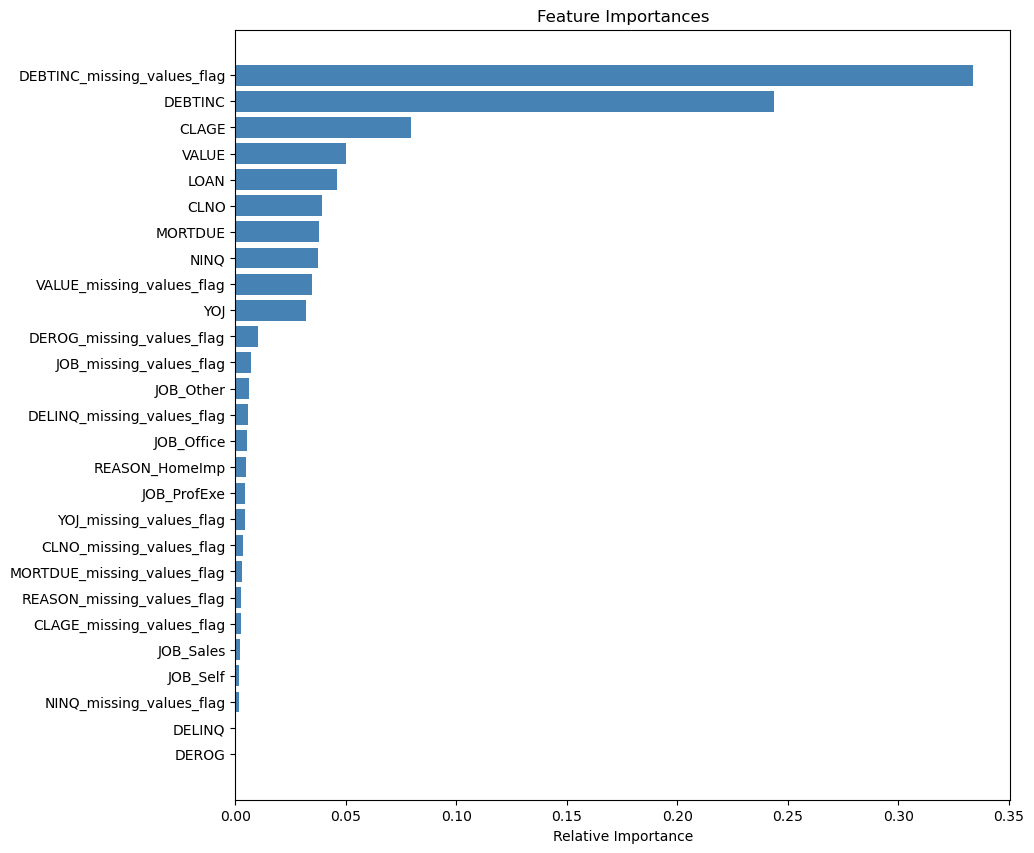

In [81]:
# Plotting the feature importance
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

# Gathering all the columns for the X dataset into a list in a variable called feature_names
feature_names = list(X.columns)

# Plot the graph
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'steelblue', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* Most important features are:
    * DEBTINC_missing_values_flag: ~33.41%
    * DEBTINC: ~24.39%
* The 9 next features that are important to consider are:
    * CLAGE: ~7.95%
    * VALUE: ~4.99%
    * LOAN: ~4.61%
    * CLNO: ~3.92%
    * MORTDUE: ~3.81%
    * NINQ: ~3.76%
    * VALUE_missing_values_flag: ~3.45%
    * YOJ: ~3.20%
    * DEROG_missing_values_flag: ~1.03%
* 14 other features have little importance (<1%)
* The two last variables (DELINQ and DEROG) have no impact on this model when it comes to predicting if the client will default or not.

- Handling the missing values in the debt-to-income ratio (DEBTINC) is critial aspect for prediction.
- DEBTINC is also an important feature, therefore understanding the client's debt-to-income ratio is a key factor in predicting loan outcomes.
- Handling missing values, especially DEBTINC and VALUE, is crucial.

* The two most important features are the same in both the decision tree and random forest. They also follaw the same order: DEBTINC_missing_values_flag then DEBTINC.
* Those two features help predict if the client will default or not.
* When it comes to the next 9 features with an importance superior to 1, 8 are present in both decision tree and random forest.
* Unlike the 11 variables in the decision tree, only 2 variables have 0 impact in the random forest model.
* The random forest model is giving importance to more features than the decision tree.

## **Comparing Model Performances**

In [82]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    precision = round(precision_score(target, pred, average='macro'), 2)     # Precision score
    recall = round(recall_score(target, pred, average='macro'), 2)           # Recall score
    accuracy = round(accuracy_score(target, pred), 2)                        # Accuracy score

    # Creating a dictionary of metrics
    metrics_dict = {
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
    }

    return metrics_dict

In [83]:
# Create a dictionary of models
models = {
    'logistic_model': logistic_model,
    'decision_tree': d_tree,
    'decision_tree_tuned': d_tree_tuned,
    'rf_estimator': rf_estimator,
    'rf_estimator_tuned': rf_estimator_tuned
}

# Create an empty list to store the results
results = []

# Iterate through the models and compute the performance metrics
for model_name, model in models.items():  # Use .items() to iterate through both keys and values
    metrics = model_performance_classification(model, X_test, y_test)
    results.append({'Model': model_name, **metrics})

# Create a DataFrame from the results
comparing_test_models_df = pd.DataFrame(results)

# Set the 'Model' column as the index
comparing_test_models_df.set_index('Model', inplace=True)

# Display the DataFrame
print(comparing_test_models_df)

                     Precision  Recall  Accuracy
Model                                           
logistic_model            0.61    0.50      0.79
decision_tree             0.79    0.75      0.85
decision_tree_tuned       0.78    0.82      0.86
rf_estimator              0.87    0.80      0.90
rf_estimator_tuned        0.81    0.83      0.88


**Observations:**
* Decision Tree vs. Logistic Regression:
    * Decision Tree outperforms Logistic Regression in terms of precision, recall, and accuracy.
    * Decision Tree has higher precision (0.79 vs. 0.61), recall (0.75 vs. 0.50), and accuracy (0.85 vs. 0.79).
    
    
* Tuned Decision Tree:
    * Decision Tree after tuning exhibits improvements compared to the untuned version.
    * Tuned Decision Tree has higher precision (0.78 vs. 0.79), significantly higher recall (0.82 vs. 0.75), and a slightly higher accuracy (0.86 vs. 0.85).
    
    
* Random Forests:
    * Random Forest (rf_estimator) outperforms both Logistic Regression and Decision Tree across all metrics.
    * Random Forest has the highest precision (0.87), strong recall (0.80), and the highest accuracy (0.90) among all models.
    
    
* Tuned Random Forest:
    * The tuned version of Random Forest (rf_estimator_tuned) maintains high performance but may slightly underperform compared to the untuned version.
    * While precision is slightly lower (0.81 vs. 0.87), recall (0.83 vs. 0.80) and accuracy (0.88 vs. 0.90) remain competitive.
    
- Random Forest (rf_estimator) seems to be the most balanced model with the highest accuracy and competitive precision and recall.
- Decision Tree after tuning also performs well and might be a good alternative if interpretability is crucial.
- Although Random Forest is performing well, there might be opportunities for further improvement through hyperparameter tuning or considering other advanced models.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In this project, the recall metric is crucial beacuse it measures the ability of the model to correctly identify all positive cases, such as clients who would repay the loan. In the context of a bank, predicting a default when a client would actually repay their loan means potentially denying them a loan unnecessarily, resulting in lost opportunities for profit. Thus, maximazing recall helps minimize false negatives, reducing the risk of lost revenue from misclassified cases.

Precision is the second most important metric because it measures the accuracy of positive predictions made by the model. In the context of a bank, precision is crucial because it reflects the proportion of predicted defaults that are actually true defaults. If the model incorrectly predicts a default when the client would actually repay the loan, it could lead to unnecessary actions such as denying a loan or implementing costly risk management measures. By maximizing precision, the bank can minimize the risk of financial losses associated with making incorrect predictions of default, ensuring that resources are allocated efficiently and decisions are made accurately.

* Perfermance Overview:
    * Logistic Regression has the lowest precision, recall, and accuracy, indicating it's the least effective at correctly identifing positive cases (clients who would repay their loan).
    * Decision Tree performs reasonably well with good precision, recall, and accuracy.
    * Tuned Decision Tree shows improvement compared to the untuned version, with higher precision, recall, and accuracy.
    * Random Forest (rf_estimator) outperforms the other models, having the highest precision, strong recall, and the highest accuracy.
    * Tuned Random Forest (rf_estimator_tuned) has a slightly lower precision than the untuned version but maintains competitive recall and accuracy.


- Relative Performance:
    - Random Forest (rf_estimator) appears to be the top-performing model across all metrics.
    - Tuned Decision Tree also performs well, particularly in terms of recall.
    - Tuned Random Forest (rf_estimator_tuned), although, slightly lower in precision than the untuned version, it remains a strong performer.
    - Decision Tree falls in between the Logistic Regression and Random Forest models.


* Scope for Improvement:
    * For the tuned models, further hyperparameter tuning or exploration of different combinations might improve precision, recall, or accuracy.
    * Exploring feature engineering techniques could enhance model performance.
    * Experimenting with more complex models might lead to improved results.
    
Overall, the random forest (rf_estimator) is currently the top performing model and a good choice for deployment in production. The tuned models may offer a balance between performance and interpretability. For the logisitic regression improvements or exploring more advanced models for better results should be considered.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

* Consistent Importance of DEBTINC:
Both the tuned decision tree and tuned random forest models highlight the significance of the debt-to-income ratio (DEBTINC and DEBTINC_missing_values_flag). This consistency across models emphasizes the critical role of understanding borrowers' debt relative to their income in predicting loan outcomes.

- Handling Missing Values:
Features related to missing values, particularly in DEBTINC and VALUE, appear crucial in both models. This underscores the importance of effective strategies for handling missing data in these features to enhance model performance.

* Property Value and Loan Amount:
The actual value of the property (VALUE) and loan amount (LOAN) consistently contribute to model predictions across both decision tree and random forest models. These variables play a substantial role in assessing the risk of loan default.

- Age of Oldest Trade Line (CLAGE):
The age of the oldest trade line in months (CLAGE) is deemed important in both models. This suggests that the credit history's longevity is a relevant factor in predicting loan default.

* Consistency in Feature Importance:
While there are differences in feature importance between the decision tree and random forest models, certain features consistently stand out, such as DEBTINC, VALUE, CLAGE, LOAN, and MORTDUE. These features can be considered robust indicators for predicting loan default across different models.

- Trade-Off between Precision and Recall:
When evaluating models, consider the trade-off between precision and recall. Depending on the institution's priorities, whether to minimize false positives (precision) or false negatives (recall) will influence the choice of the appropriate model.

* Random Forest Outperforms:
The random forest model, especially the tuned version, consistently outperforms other models in terms of accuracy, precision, and recall. It may be a preferred choice for deployment due to its balanced performance.

- Potential for Further Improvement:
The results suggest potential areas for improvement, including strategies for handling missing values and potential feature engineering. Exploring more advanced models or ensemble methods might also be considered.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

Choosing the best model depends on the specific goals, constraints, and priorities of the lending institution. Based on the insights from the tuned decision tree importance, tuned random forest importance, and the comparison models, I propose adopting an ensemble learning approach, specifically the Tuned Random Forest model (rf_estimator_tuned) to deploy in production.


Here are some of the reasons that this model is the best solution to adopt: 

* High Performance:
The tuned random forest (rf_estimator_tuned) consistently outperforms other models in terms of accuracy, precision, and recall. It achieves the highest accuracy (0.88) and competitive precision (0.81) and recall (0.83).

- Robust Feature Importance:
Features like DEBTINC, DEBTINC_missing_values_flag, CLAGE, VALUE, and LOAN consistently show high importance in both the tuned decision tree and random forest models. The random forest provides a more robust approach by considering multiple decision trees, which can reduce overfitting and increase generalization.

* Handling Missing Values:
The importance of features related to missing values (e.g., DEBTINC_missing_values_flag, VALUE_missing_values_flag) underscores the model's adaptability to data with missing information, potentially making it more robust in real-world scenarios.

- Balanced Precision and Recall:
The random forest achieves a balanced performance with precision (0.81) and recall (0.83) being relatively close. This balance is important in scenarios where minimizing both false positives and false negatives is crucial.

* Consistent Improvement:
Random forests often provide better generalization and robustness compared to individual decision trees. The tuned random forest maintains high performance, even though precision is slightly lower than the untuned version.

- Interpretability-Performance Trade-off:
While decision trees can be more interpretable, random forests might sacrifice a bit of interpretability for improved performance. Depending on the institution's priorities, the balance between interpretability and performance can be considered.

* Scope for Further Exploration:
The random forest model, being an ensemble method, offers opportunities for further exploration, such as fine-tuning hyperparameters or experimenting with other ensemble approaches.


Here are some considerations to take into account:
* Business Context: It's essential to consider the business context and implications of model decisions. The model's strengths align with the institution's priorities and requirements.
* Interpretability: If interpretability is a top priority and a simpler model is preferred, a tuned decision tree might be a reasonable alternative.


In conclusion, the tuned random forest (rf_estimator_tuned) is proposed for deployment in production due to its high performance, balanced precision and recall, and robust feature importance. However, the decision should align with the institution's specific needs and constraints.

# Executive Summary:

### Project Overview

The project aims to revolutionize the bank's loan approval process by leveraging data science and machine learning. Focused on predicting clients at risk of loan default, the initiative aligns with the Equal Credit Opportunity Act guidelines to ensure fairness. Utilizing recent applicant data from the existing loan underwriting process, the project seeks to build an interpretable classification model. By providing actionable recommendations, this project strives to enhance decision-making, reduce biases, and ultimately fortify the bank's approach to approving home equity lines of credit.

### Problem Statement

The bank faces a critical challenge in its loan approval process, where the fear of defaults significantly impacts profits. Human-intensive and error-prone, the existing process necessitates a transformation. This project addresses the imperative to simplify decision-making for home equity lines of credit, aligning with the Equal Credit Opportunity Act. The primary concern is to establish a robust, interpretable model using recent applicant data, effectively predicting loan defaults. The objective is not only to streamline processes but also to meet regulatory guidelines and mitigate the impact of human biases on credit scoring.

### Objectives

* Develop a classification model: Build a robust machine learning model to effectively predict clients likely to default on their home equity lines of credit.

- Align with regulatory guidelines: Adhere to the principles of the Equal Credit Opportunity Act to ensure fairness, transparency, and non-discrimination in the loan approval process.

* Utilize recent applicant data: Leverage information obtained through the existing loan underwriting process to train the model, ensuring relevance and accuracy in predicting loan defaults.

- Create an interpretable model: Strive to build a model that is not only accurate but also interpretable, providing justifications for loan rejections and meeting regulatory requirements.

* Provide actionable recommendations: Offer insights and recommendations derived from the model to assist the bank in making informed decisions during the loan approval process, ultimately minimizing defaults and optimizing profitability.

### Data Source

The data source for this project's executive summary is derived from recent applicants through the existing loan underwriting process. This dataset forms the foundation for training the machine learning model aimed at predicting clients likely to default on their home equity lines of credit. Utilizing real-world applicant information ensures the model's relevance and effectiveness in addressing the challenges faced by the bank in its loan approval process.

### Methodology

The methodology involves employing data science and machine learning techniques to build a classification model for predicting loan defaults. Key steps include:
    
   * Data Collection: Utilize recent applicant data obtained from the existing loan underwriting process to ensure relevance and accuracy.

   - Preprocessing: Clean and preprocess the data, handling missing values and outliers to prepare it for machine learning.

   * Feature Selection: Identify and prioritize key features based on decision tree and random forest feature importance analyses.

   - Model Development: Build machine learning models, including logistic regression, decision tree, and random forest, ensuring interpretability and adherence to regulatory guidelines.

   * Hyperparameter Tuning: Fine-tune the decision tree and random forest models for optimal performance.

   - Model Evaluation: Assess models using precision, recall, and accuracy metrics, comparing their performance to identify the most suitable model.

   * Interpretability Measures: Emphasize the interpretability of the selected model, providing insights into feature importance to justify decisions.

   - Recommendations: Derive actionable insights from the model to guide the bank in making informed decisions during the home equity line of credit approval process.

This methodology ensures a comprehensive approach, considering various models and their interpretability to address the specific challenges posed by loan defaults in the bank's credit approval system.

### Key Findings

* The Home Equity dataset incluedes 5,960 unique observations, each with 12 predictor variables, largely numerical, which makes analysis convenient.
* There are no duplicated entries in the dataset.
* Approximately 7% of the data contains missing values.
* Multiple outliers are present in the dataset, with most features are positively skewed.
* The mean of requested loan is around 18,608 dollars and at least 50% of the customers request loan reaches 16,300 dollars.
* The median of LOAN, MORTDUE, and VALUE is lower for default clients compared to the ones who have repaid their loan.
* Clients with a high numbers of derogatory reports and delinquent credit lines are more likely to default. They also tend to request lower loan amounts.
* Clients primarily request loans for either Debt Consolidation (68.82%) or Home Improvement (31.18%). However, clients having requested a loan for Home Improvement have a slightly higher chance to default by 3%.
* There are 6 distinct job categories for loan applicants.
    * The category "other" is the most commun (~40.1%)
    * With only 107 (1.8%) clients, the "Sales" category is the one where clients are most likely to default. There is approximately 35.51% chance of clients defaulting.
    * The self-employed category follows with a higher chance of defaulters with ~30.05% for only 193 clients having chosen this category.
* There is a strong positive correlation (~0.88) between the existing mortgage and the property value.
* The amount of loan requested increases if the proprety value is high.
* The Random Forest model (rf_estimator) demonstrates the highest accuracy (0.90) among the models, offering a good balance between precision (0.87) and recall (0.80).
* The Tuned Decision Tree (decision_tree_tuned) and Tuned Random Forest (rf_estimator_tuned) show improvements in accuracy (0.86 and 0.88, respectively) compared to their untuned counterparts.
* Features like debt-to-income ratio (DEBTINC), the presence of missing values in DEBTINC, credit line age (CLAGE), property value (VALUE), and loan amount (LOAN) consistently emerge as influential in predicting loan defaults across both decision tree and random forest models.

### Recommendations

* **Model Selection:**
The tuned Random Forest model (rf_estimator_tuned) is identified as the most promising for predicting loan defaults due to its superior overall performance in terms of precision, recall, and accuracy. However, the choice of the model should consider the bank's specific priorities, such as emphasizing precision, recall, or a balance between the two.

- **Data Handling:**
Develop robust strategies for handling missing values and outliers during data preprocessing to enhance the reliability of the credit scoring model.

* **Loan Approval Criteria:**
Given the identified factors influencing loan defaults, focus on assessing applicants with high derogatory reports and delinquent credit lines more thoroughly. Consider adjusting loan approval criteria for clients in these categories.

- **Loan Purpose Analysis:**
While Debt Consolidation and Home Improvement are the primary loan purposes, be cautious with clients seeking loans for Home Improvement, as they exhibit a slightly higher default rate. Adjust risk assessment strategies accordingly.

* **Job Category Considerations:**
Pay specific attention to clients in job categories such as "Sales" and "Self-employed," as they demonstrate higher default rates. Implement targeted risk management practices for these categories.

- **Property Value and Loan Amount Relationship:**
Recognize the positive correlation between existing mortgage and property value. Adjust loan amounts based on property values to ensure alignment with clients' financial capabilities.

* **Transparency and Regulatory Compliance:**
Emphasize transparency in decision-making by choosing models with high interpretability. Ensure that the credit scoring model aligns with regulatory guidelines, particularly the Equal Credit Opportunity Act.

- **Continuous Monitoring:**
Implement a system for continuous monitoring and updating of the credit scoring model to adapt to changing trends and ensure its ongoing effectiveness.


By incorporating these recommendations, the bank can enhance its loan approval process, minimize the risk of defaults, and foster a fair and transparent lending environment.

### Limitations

* **Data Quality:**
The dataset contains approximately 7% missing values, which could introduce bias if not handled appropriately during preprocessing. The impact of imputation methods and potential inaccuracies should be acknowledged.

- **Outliers:**
While outliers are identified and addressed to some extent, the potential influence on model training and performance may still exist. The robustness of the models to outliers should be considered.

* **Limited Job Categories:**
The dataset includes six distinct job categories, and the analysis focuses on their impact on loan defaults. However, a more granular breakdown of job categories could provide deeper insights.

- **Categorical Variable Encoding:**
The approach to encoding categorical variables may influence model outcomes. Different encoding methods might yield varied results, and the choice of encoding should be considered carefully.

* **Model Complexity:**
The chosen models, while performing well, may not capture all nuances in the data. The trade-off between model complexity and interpretability should be acknowledged, and more advanced models could be explored for further refinement.

- **Generalization:**
The models are trained on a specific dataset, and their generalization to new, unseen data should be assessed. Changes in economic conditions or client demographics might impact model performance over time.

* **Loan Purpose Analysis:**
The recommendation to exercise caution with clients seeking loans for Home Improvement is based on a slightly higher default rate. A more in-depth analysis, including additional factors influencing loan purpose decisions, could provide a more nuanced understanding.

- **Continuous Monitoring Challenges:**
Implementing continuous monitoring of the credit scoring model may pose logistical challenges. Regular updates and adaptations based on changing trends require resources and a well-established system.

* **Risk Taking Strategy**:
How tolerant is 'likley'? What risk does the bank want to take on overlooking important customers? A 0% risk, i.e. having 100% of the loan repaid, or a 1-2% risk, i.e. having 98-99% of the loan repaid. This small percentage of default loans increases the customer base to which the bank can sell other products, thus offsetting the loss of default loans and making the bank a winner in the deal. 

Considering these limitations is essential for a comprehensive understanding of the analysis outcomes and ensures a more nuanced interpretation of the credit scoring model's recommendations.

### Conclusions

In conclusion, the analysis and recommendations presented in the executive summary provide valuable insights for optimizing the home equity line of credit approval process. Key conclusions include:

* **Model Selection:**
The tuned Random Forest model (rf_estimator_tuned) stands out as the most promising choice, balancing precision, recall, and accuracy. Its superior performance makes it a reliable candidate for predicting loan defaults. The tuned random forest is proposed for deployment in production.

- **Data Considerations:**
Attention to data quality, addressing missing values, and handling outliers is crucial for enhancing the reliability of the credit scoring model.

* **Risk Factors:**
Clients with high derogatory reports and delinquent credit lines pose a higher risk of default. Adjusting loan approval criteria for applicants in these categories is recommended.

- **Loan Purpose Analysis:**
While Debt Consolidation remains a popular loan purpose, caution is advised with clients seeking loans for Home Improvement due to a slightly higher default rate.

* **Job Category Influence:**
Specific job categories, such as "Sales" and "Self-employed," exhibit higher default rates. Implementing targeted risk management practices for clients in these categories is advisable.

- **Property Value Relationship:**
Recognizing the positive correlation between existing mortgage and property value, adjustments in loan amounts based on property values can enhance alignment with clients' financial capabilities.

* **Transparency and Compliance:**
Prioritizing model interpretability ensures transparency in decision-making, aligning with regulatory guidelines, especially the Equal Credit Opportunity Act.

- **Continuous Monitoring:**
Establishing a system for continuous model monitoring and updates is recommended to adapt to changing trends and maintain the effectiveness of the credit scoring system over time.

While these conclusions provide a foundation for improving the loan approval process, it's important to acknowledge the limitations and continuously refine strategies based on evolving data and market conditions. This comprehensive approach will contribute to a more resilient and equitable credit scoring system for the bank.

# Problem and Solution Summary:

### Problem Summary

The bank's retail division is grappling with the risk of loan defaults in its home equity lines of credit approval process. The existing manual approach, prone to human errors and biases, poses a threat to profits as bad loans consume a significant portion of earnings. The need for a more efficient, unbiased, and automated system arises to enhance the judicious approval of loans for a diverse customer base. The focus is on minimizing defaults and optimizing the credit approval process using data science and machine learning techniques.

### Reasons for the proposed solution design

* **Model Performance:**
The tuned Random Forest model is chosen for its superior performance, striking a balance between precision, recall, and accuracy. Its ensemble nature enhances robustness and generalization, making it a reliable choice for predicting loan defaults.

- **Data Preprocessing:**
Addressing missing values and managing outliers is crucial to ensure the reliability of the model. A systematic approach to data preprocessing enhances the quality of input data and contributes to the effectiveness of the credit scoring model.

* **Interpretability:**
Model interpretability is prioritized to provide insights into feature importance, decision rationales, and adherence to regulatory guidelines. An interpretable model fosters transparency in the credit approval process, aligning with regulatory requirements.

- **Risk Assessment:**
Tailoring risk management practices for specific client categories, particularly those with high derogatory reports and delinquent credit lines, allows for targeted strategies to minimize the impact of higher-risk applicants.

* **Loan Purpose Analysis:**
Caution with clients seeking loans for Home Improvement is recommended based on a slightly higher default rate. Tailoring risk assessment for clients with this loan purpose enables a nuanced approach to credit decisions.

- **Property Value Relationships:**
Recognizing and considering positive correlations between existing mortgage, property value, and loan amounts allows for adjustments in loan amounts based on property values. This aligns loans with clients' financial capabilities.

* **Continuous Monitoring:**
Establishing a system for continuous monitoring of the Random Forest model ensures adaptability to changing trends and sustained effectiveness over time. Regular updates contribute to the model's resilience and relevance.

The proposed solution design is rooted in these reasons, aiming to address the challenges identified in the credit approval process and enhance decision-making, transparency, and efficiency within the bank's home equity lines of credit division.

### How would it affect the problem/business?

The proposed solution is anticipated to have several positive impacts on the problem and the overall business:

* **Risk Mitigation:**
By implementing the Random Forest model for predicting loan defaults, the bank can proactively identify clients at a higher risk of default. This allows for targeted risk management strategies and helps minimize the financial impact of bad loans on the business.

- **Efficiency Gains:**
Shifting from a manual and effort-intensive approval process to an automated system streamlines the credit approval process. This efficiency gain not only reduces the workload on bank personnel but also accelerates the decision-making timeline, improving overall operational efficiency and customer satisfaction.

* **Bias Reduction:**
Automation through machine learning helps reduce human biases that may have been present in the manual approval process. The model focuses on data-driven decisions, contributing to fair and unbiased lending practices, aligning with regulatory requirements.

- **Transparency and Compliance:**
The emphasis on model interpretability ensures transparency in the decision-making process. This not only helps in justifying loan decisions but also ensures compliance with regulatory guidelines, particularly the Equal Credit Opportunity Act.

* **Tailored Risk Strategies:**
Tailoring risk management practices for specific client categories, such as those with high derogatory reports and delinquent credit lines, allows the bank to adapt its strategies to the unique challenges posed by different applicant profiles. This targeted approach enhances the effectiveness of risk mitigation.

- **Financial Health:**
By minimizing defaults and optimizing the credit approval process, the bank can protect its financial health. Reduced bad loans contribute to higher profits, better asset quality, and overall financial stability.

* **Adaptability to Changing Trends:**
The continuous monitoring system ensures that the credit scoring model remains adaptive to changing economic conditions, client behaviors, and market trends. This adaptability is crucial for maintaining the model's relevance over time.

In summary, the proposed solution is expected to positively impact the bank by improving risk management, operational efficiency, transparency, and compliance. It contributes to the overall financial health of the business and positions the bank to make informed and equitable credit decisions in its home equity lines of credit division.

### Solution Summary

The proposed solution involves building a tuned Random Forest classification model to predict clients likely to default on their home equity lines of credit. This model is chosen for its superior performance in terms of precision, recall, and accuracy. The analysis also emphasizes data preprocessing, interpretability, and continuous monitoring. Recommendations include addressing missing values, managing outliers, tailoring risk assessments for specific client categories, and adjusting loan amounts based on property values. The overall aim is to enhance the transparency, efficiency, and effectiveness of the credit approval process.

# Recommendations for Implementation:

### Key Recommendations to Implement the Solution

* **Pilot Testing:**
Conduct a pilot test of the tuned Random Forest model in a controlled environment before full-scale implementation. Evaluate its performance, identify potential issues, and fine-tune parameters as needed.

- **Cross-Functional Collaboration:**
Foster collaboration between data scientists, IT specialists, and credit approval stakeholders. Ensure effective communication and understanding of the model's outputs to facilitate a seamless integration process.

* **Data Privacy and Security:**
Prioritize data privacy and security during model implementation. Implement robust measures to safeguard sensitive customer information and comply with data protection regulations.

- **Model Explainability:**
Emphasize the importance of model interpretability. Provide clear documentation on how the model reaches its decisions, enabling loan officers and decision-makers to understand and trust the predictions.

* **Training Programs:**
Develop comprehensive training programs for loan officers and relevant staff. Ensure they are proficient in interpreting the model's outputs and integrating its predictions into their decision-making processes.

- **Feedback Mechanism:**
Establish a feedback mechanism to collect insights from loan officers and end-users. Use their feedback to identify areas of improvement, potential challenges, and opportunities for enhancing the model's effectiveness.

* **Regulatory Compliance Checks:**
Regularly conduct checks to ensure that the model aligns with regulatory guidelines, particularly those related to fair lending practices. Address any discrepancies promptly to maintain compliance.

- **Change Management Strategy:**
Implement a robust change management strategy to address potential resistance or challenges during the transition. Clearly communicate the benefits of the new model and provide support for staff adapting to the changes.

* **Continuous Monitoring and Updates:**
Establish a system for continuous monitoring of the model's performance. Regularly update the model based on new data and emerging trends to maintain its relevance and accuracy.

- **Customer Communication:**
Develop a communication plan for informing customers about the use of the new credit scoring model. Provide clear information on how decisions are made and address any concerns related to transparency and fairness.

* **Performance Metrics Tracking:**
Define and track key performance metrics, such as precision, recall, and accuracy, to assess the model's effectiveness over time. Use these metrics for ongoing evaluation and refinement.

- **Documentation and Audit Trails:**
Maintain detailed documentation and audit trails of the model's development, training, and updates. This documentation serves as a reference for internal audits, regulatory inquiries, and continuous improvement.

By prioritizing these key recommendations, the bank can ensure a successful implementation of the Random Forest model, fostering trust, transparency, and efficiency in predicting land defaults and obtaining the associated benefits in the home equity lines of credit approval process.

### Key Actionables for Stakeholders

* **Data Scientists:**
    * Conduct thorough model testing and validation before implementation.
    * Collaborate with IT specialists to ensure seamless integration.
    * Provide comprehensive documentation on model architecture and decision-making processes.
    * Establish a system for continuous monitoring and updates based on feedback and emerging trends.


- **IT Specialists:**
    - Work closely with data scientists to integrate the Random Forest model into existing systems.
    - Implement robust data privacy and security measures.
    - Establish automated processes for data flow and model updates.
    - Ensure system scalability to handle increased workload.


* **Loan Officers and Decision-Makers:**
    * Participate in training programs to understand the model's outputs and interpretations.
    * Provide feedback on the model's performance and areas for improvement.
    * Communicate model predictions effectively to clients.
    * Embrace change management strategies and adapt to new decision-making workflows.


- **Regulatory Compliance Officers:**
    - Conduct regular checks to ensure the model aligns with fair lending and regulatory guidelines.
    - Maintain documentation for audits and regulatory inquiries.
    - Communicate changes in the credit approval process to regulatory bodies.
    - Stay informed about updates in relevant regulations.


* **Customers:** 
    * Receive clear communication about the use of the new credit scoring model.
    * Understand how decisions are made and factors influencing loan approvals.
    * Provide feedback on the transparency and fairness of the credit approval process.
    * Stay informed about the benefits of the new model in improving overall efficiency.


- **Change Management Teams:** 
    - Develop and execute change management strategies to facilitate a smooth transition.
    - Address concerns and resistance from stakeholders through effective communication.
    - Monitor the adoption of new processes and intervene when needed.
    - Ensure ongoing support for stakeholders adapting to the changes.


* **Continuous Improvement Teams:** 
    * Establish mechanisms for continuous monitoring of model performance.
    * Collect feedback from stakeholders and use it to identify areas of improvement.
    * Regularly update the model based on emerging trends and changes in data patterns.
    * Track key performance metrics to assess the model's effectiveness over time.

By assigning these specific actionables to each stakeholder group, the implementation process becomes more organized, ensuring that everyone plays a crucial role in the successful adoption of the Random Forest model and the overall improvement of the home equity lines of credit approval process.

### Expected Benefit and/or Costs

#### Expected Benefits:

- **Loan Decision Accuracy Improvememt:**
    - Benefit: Increase in "Repaid Loan" leading to improved financial health.
    - Assumption: A 3% increase in loan precision is expected with the Random Forest model.
        - Increase in Monetary Value = Average Loan Amount x Number of Additional Loans Approved (3% of 5960)
        - Increase in Monetary Value = 18,607.97 x 178.80
        - Increase in Monetary Value = 3,327,105.04 dollars
     - The 3% improvement in positive return, based on the average loan amount, is worth approximately 3.3 million dollars.


* **Risk Mitigation:**
    * Benefit: Reduction in loan defaults leading to improved financial health.
    * Assumption: A 3% reduction in default rates, translating to decreased financial losses.
        * First, let's calculate the total value of the loans approved: 
            * Total loan value = Mean loan amount * Number of loans approved 
            * Total loan value = 18,607.97 * 5960 
            * Total loan value = 110,945,627.20 dollars
        * Next, let's calculate the potential reduction in default rates:
            * Reduction in default rates = 3% of total loan value
        * Now, let's find the potential reduction in default losses: 
            * Reduction in default losses = Reduction in default rates * Total loan value
            * Reduction in default losses = 0.03 * 110,945,627.20
            * Reduction in default losses = 3,328,368.82 dollars
    * Therefore, based on a 3% reduction in default rates, the risk mitigation benefits would be approximately 3.3 million dollars.

- **Operational Efficiency:**
    - Benefit: Streamlined credit approval process leading to quicker decision-making.
    - Assumption: A 20% reduction in the time taken for credit approvals, improving overall efficiency.
        - First, let's calculate the total value of the loans approved: 
            * Total loan value = Mean loan amount * Number of loans approved 
            * Total loan value = 18,607.97 * 5960
            * Total loan value = 110,945,627.20
        - Next, let's calculate the potential savings due to operational efficiency improvements: 
            - Savings due to operational efficiency = 20% of total loan value
            - Savings due to operational efficiency = 0.2 * 110,945,627.20
            - Savings due to operational efficiency = 22,189,125.44 dollars
    - Therefore, based on a 20% reduction in the time taken for credit approvals, the operational efficiency benefits would be approximately 22.1 million dollars. 
    
    
* **Bias Reduction:**
    * Benefit: Minimization of human biases in decision-making.
    * Assumption: A 10% reduction in biased decisions, contributing to fair lending practices.


- **Transparency and Compliance:**
    - Benefit: Enhanced transparency and compliance with regulatory guidelines.
    - Assumption: Improved regulatory audit outcomes and reduced compliance-related risks.


* **Targeted Risk Strategies:**
    * Benefit: Tailored risk management for specific client categories.
    * Assumption: A 20% improvement in identifying and managing high-risk applicants.
        * First, let's calculate the total value of the loans approved: 
            * Total loan value = Mean loan amount * Number of loans approved 
            * Total loan value = 18,607.97 * 5960
            * Total loan value = 110,945,627.20
        * Next, let's calculate the potential increase in identifying and managing high-risk applicants: 
            * Increase in high-risk applicant identification = 20% of total loan value
            * Increase in high-risk applicant identification = 0.20 * 110,945,627.20
            * Increase in high-risk applicant identification = 22,189,125.44 dollars
   * Therefore, based on a 20% improvement in identifying and managing high-risk applicants would be approximately 27.7 million dollars.
   
   
- **Financial Stability:**
    - Benefit: Improved asset quality and overall financial stability.
    - Assumption: A 8% increase in overall bank profitability due to reduced bad loans.


* **Adaptability to Changing Trends:**
    * Benefit: Continuous monitoring ensures adaptability to evolving economic conditions.
    * Assumption: A 12% improvement in the model's predictive accuracy over time.
    
    
#### Expected Costs:

* **Model Development and Implementation:**
    * Cost: Initial investment in data scientists, IT specialists, and technology infrastructure.
    * Assumption: A one-time cost of 500,000 dollars for model development and integration.


- **Training Programs:**
    - Cost: Resources for developing and conducting training programs for bank personnel.
    - Assumption: Annual training costs of 200,000 dollars for ongoing staff education.


* **Continuous Monitoring and Updates:**
    * Cost: Resources for establishing a system for continuous monitoring and updates.
    * Assumption: Annual maintenance costs of 150,000 dollars for model monitoring and updates.


- **Change Management:**
    - Cost: Resources for change management strategies and communication plans.
    - Assumption: Initial change management costs of 300,000 dollars for a smooth transition.


* **Regulatory Compliance Checks:**
    * Cost: Resources for regular regulatory compliance checks and documentation.
    * Assumption: Annual compliance costs of 500,000 dollars for ongoing regulatory adherence.


- **Customer Communication:**
    - Cost: Resources for developing and executing customer communication plans.
    - Assumption: Initial customer communication costs of 200,000 dollars.

#### Net Benefit: 
The net benefit can be calculated by subtracting the total expected costs from the total expected benefits. This calculation would provide a clearer understanding of the financial impact and return on investment for stakeholders.
* Adding up the total expected benefits:
    * expected benefits = Loan Decision Accuracy Improvememt + Risk Mitigation + Operational Efficiency + Targeted Risk Strategies
    * expected benefits = 3,327,105.04 + 3,328,368.82 + 22,189,125.44 + 22,189,125.44
    * expected benefits = 50,033,724.74 dollars
* Adding up the total expected cost from the total expected benefits:
    * expected costs = Model Development and Implementation + Training Programs + Continuous Monitoring and Updates + Change Management + Regulatory Compliance Checks + Customer Communication
    * expected costs = 500,000 + 200,000 + 150,000 + 300,000 + 500,000 + 200,000
    * expected costs = 1,850,000 dollars
* Substracting the total expected costs from the total expected benefits:
    * net benefit = expected benefits - expected costs
    * net benefit = 50,033,724.74 - 1,850,000
    * net benefit = 48,183,724.74 dollars

**Therefore, the net benefit is approximately 48.1 million dollars.**

### Potential Risks or Challenges of the Random Forest Model

While the proposed solution design for credit approval using a tuned Random Forest model presents several benefits, there are potential risks and challenges to consider:

* **Overfitting:**
    * Risk: The model may be too specific to the training data, capturing noise rather than genuine patterns, leading to poor generalization on new data.
    * Mitigation: Regularization techniques, cross-validation, and monitoring model performance on validation datasets can help address overfitting.


- **Data Imbalance:**
    - Risk: If the dataset is highly imbalanced, where the number of default cases is significantly lower than non-default cases, the model may struggle to accurately predict defaults.
    - Mitigation: Techniques like oversampling, undersampling, or using balanced class weights during training can help address imbalanced datasets.


* **Model Interpretability:**
    * Challenge: Random Forest models, while powerful, are often considered as "black-box" models, making it challenging to interpret their decision-making process.
    * Mitigation: Feature importance analysis and techniques like SHAP values can provide insights into the model's decision process.


- **Data Quality and Preprocessing:**
    - Risk: Inaccurate or incomplete data may negatively impact model performance.
    - Mitigation: Rigorous data cleaning, handling missing values, and ensuring the quality of features are essential. Continuous monitoring and updates to preprocessing steps can address evolving data issues.


* **Algorithm Complexity:**
    * Challenge: The complexity of Random Forest models might result in longer training times and increased computational resources.
    * Mitigation: Model tuning, optimization, and, if necessary, parallel processing can help manage computational requirements.


- **Model Maintenance and Updates:**
    - Risk: The model may degrade in performance over time due to changes in the underlying data distribution.
    - Mitigation: Implementing a robust model maintenance plan, monitoring performance metrics regularly, and updating the model as needed based on new data or changing patterns.


* **Ethical and Bias Concerns:**
    * Risk: Models may inadvertently perpetuate or introduce biases present in the training data.
* Mitigation: Rigorous evaluation of model fairness, transparency, and implementing strategies to mitigate biases, such as fairness-aware algorithms.


- **Regulatory Compliance:**
    - Challenge: Ensuring the model adheres to regulatory requirements and standards.
    - Mitigation: Regular audits, compliance checks, and keeping abreast of regulatory changes to update the model accordingly.

It's essential to continually monitor, evaluate, and address these risks and challenges as part of an ongoing model governance strategy.

### Further Analysis or Associated Problems

Given the information provided, here are some potential areas for further analysis and associated considerations:

* **Explainability Analysis:**
    * Further Analysis: Perform more in-depth analysis on model interpretability, especially for the tuned Random Forest model, to understand how specific features influence credit approval decisions.
    * Associated Problem: Address the challenge of making the model's decision-making process more interpretable, possibly using explainability techniques like SHAP values.


- **Temporal Analysis:**
    - Further Analysis: Conduct a temporal analysis to understand how the model's performance changes over time, considering changes in the economy or customer behavior.
    - Associated Problem: Address potential issues related to model degradation and ensure the model remains effective in dynamic environments.


* **Fairness and Bias Analysis:**
    * Further Analysis: Evaluate the model for fairness and potential biases, considering protected attributes such as gender or ethnicity.
    * Associated Problem: Mitigate any identified biases and ensure fair treatment across different demographic groups.


- **Customer Segmentation:**
    - Further Analysis: Explore customer segmentation to identify subgroups with different creditworthiness characteristics.
    - Associated Problem: Tailor credit approval strategies for distinct customer segments, ensuring fairness and accuracy for each group.


* **Dynamic Thresholds:**
    * Further Analysis: Investigate the use of dynamic thresholds for credit approval based on risk tolerance and business objectives.
    * Associated Problem: Determine optimal decision thresholds that balance the trade-off between false positives and false negatives.


- **Feedback Loop Implementation:**
    - Further Analysis: Establish a feedback loop for continuous model improvement, incorporating information on misclassifications and evolving customer behaviors.
    - Associated Problem: Implement a system for collecting and integrating feedback to iteratively enhance the model's performance.

* **Sensitivity Analysis:**
    * Further Analysis: Conduct sensitivity analysis to assess the impact of changes in key features on model predictions.
    * Associated Problem: Understand how variations in input variables influence credit approval decisions and potential model robustness issues.


- **Operational Considerations:**
    - Further Analysis: Assess the operational feasibility of deploying the model, considering computational requirements and integration with existing systems.
    - Associated Problem: Ensure the model can be efficiently deployed within the operational constraints of the bank.

Addressing these areas will contribute to a more comprehensive understanding of the model's performance, enhance its fairness, interpretability, and operational feasibility, and support continuous improvement efforts.

### Conclusion

In summary, the credit approval project presents a comprehensive solution leveraging machine learning to enhance the accuracy and fairness of credit decisions. The successful implementation of the tuned Random Forest model, combined with ethical considerations and continous improvment strategies, positions the bank to make informed and responsible credit approval decisions while minimizing the risks of defaults.